In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
#loading dataset into python
path = 'D:/Documents/shubh/Canada2023/CapeBretonUniversity/Semester4/CapstoneProject/Docsfromemployer/datasetupdated.xlsx'
df=pd.read_excel(path)
df.head()


,Product_ID,Category,Product_Name,Cost_Price,Competitor_Price,Demand_Level,Season,Promotion,Market_Trend,Historical_Sales,Initial_Stock,Current_Stock,Price,Margin
0,SKU-000001,Sports,Yoga Mat,140.62,171.59,1,Fall,1,0.92,462,169,107,192.23,0.367017
1,SKU-000002,Books,Graphic Novel,6.97,7.54,2,Spring,0,0.60,615,450,420,7.67,0.100430
2,SKU-000003,Home & Kitchen,Blender,385.23,450.03,3,Spring,0,-0.08,788,91,51,423.75,0.099992
3,SKU-000004,Books,Graphic Novel,9.06,9.31,2,Winter,0,-0.60,750,740,705,11.06,0.220751
4,SKU-000005,Books,Science Textbook,87.14,91.71,3,Winter,1,0.62,969,286,192,120.92,0.387652


In [59]:
#Dropping unnecessary variables 
df.drop(['Product_ID', 'Product_Name'], axis=1, inplace=True)


In [61]:
#examining the dataset rows and columns
df.head()


,Category,Cost_Price,Competitor_Price,Demand_Level,Season,Promotion,Market_Trend,Historical_Sales,Initial_Stock,Current_Stock,Price,Margin
0,Sports,140.62,171.59,1,Fall,1,0.92,462,169,107,192.23,0.367017
1,Books,6.97,7.54,2,Spring,0,0.60,615,450,420,7.67,0.100430
2,Home & Kitchen,385.23,450.03,3,Spring,0,-0.08,788,91,51,423.75,0.099992
3,Books,9.06,9.31,2,Winter,0,-0.60,750,740,705,11.06,0.220751
4,Books,87.14,91.71,3,Winter,1,0.62,969,286,192,120.92,0.387652


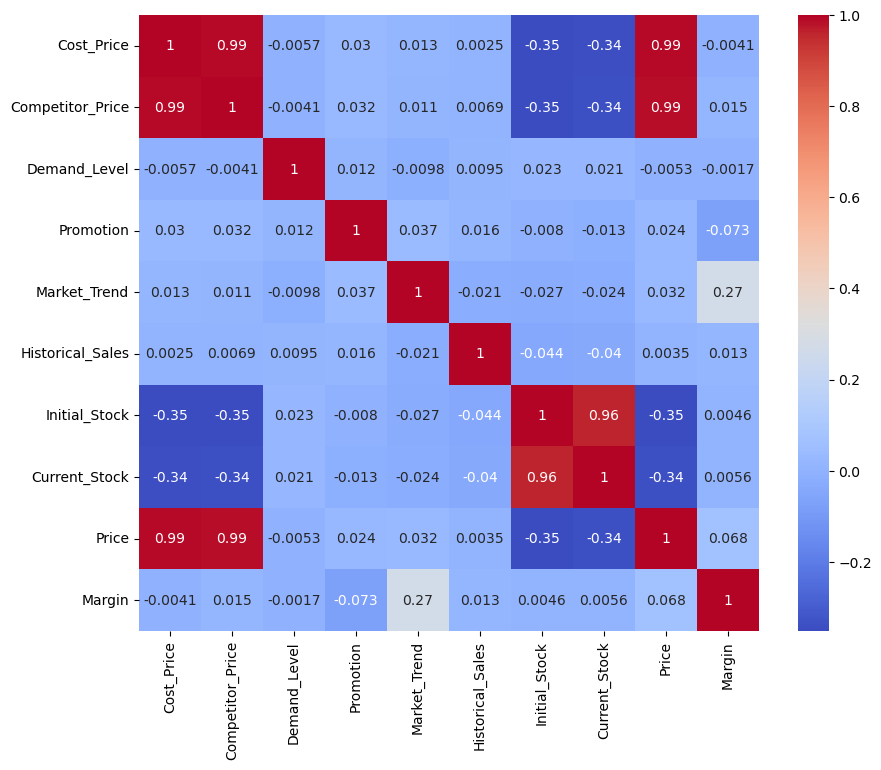

In [5]:
#building corelation matrix 
df_num = df.drop(['Category','Season'], axis=1, inplace=False)   #dropping the categorical variables 
cor_matrix1 = df_num.corr()
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(cor_matrix1, annot=True, cmap = 'coolwarm', ax=ax)   #corelation matrix heatmap
plt.savefig('corelationoriginal.jpg')
plt.show()

### No strong corelation with Margin (Target Variable)

In [63]:
#Dropping unnecessary attributes - low corelation - data set with no dummy variables
df_new=df.drop(['Promotion', 'Competitor_Price','Demand_Level','Initial_Stock',], axis=1, inplace=False)




In [14]:
#Generating summary statistics of chosen numerical variables
df_new.describe()


,Cost_Price,Market_Trend,Historical_Sales,Current_Stock,Price,Margin
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000
mean,347.609110,0.02304,531.769333,182.003667,408.437317,0.175573
std,446.377031,0.57107,277.220135,170.305716,527.802307,0.109828
min,5.350000,-1.00000,51.000000,6.000000,5.880000,0.099065
25%,76.165000,-0.46000,295.750000,70.000000,88.712500,0.099999
50%,198.290000,0.04000,533.500000,122.000000,227.545000,0.100035
75%,361.205000,0.50250,770.000000,224.000000,422.897500,0.240727
max,1998.990000,1.00000,1000.000000,974.000000,2925.000000,0.593135


In [24]:
#generating datatype/count of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          3000 non-null   object 
 1   Cost_Price        3000 non-null   float64
 2   Competitor_Price  3000 non-null   float64
 3   Demand_Level      3000 non-null   int64  
 4   Season            3000 non-null   object 
 5   Promotion         3000 non-null   int64  
 6   Market_Trend      3000 non-null   float64
 7   Historical_Sales  3000 non-null   int64  
 8   Initial_Stock     3000 non-null   int64  
 9   Current_Stock     3000 non-null   int64  
 10  Price             3000 non-null   float64
 11  Margin            3000 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 281.4+ KB


In [27]:
#generating datatype/count of the new dataset to check everything before proceeding to analysis
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          3000 non-null   object 
 1   Cost_Price        3000 non-null   float64
 2   Season            3000 non-null   object 
 3   Market_Trend      3000 non-null   float64
 4   Historical_Sales  3000 non-null   int64  
 5   Current_Stock     3000 non-null   int64  
 6   Price             3000 non-null   float64
 7   Margin            3000 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 187.6+ KB


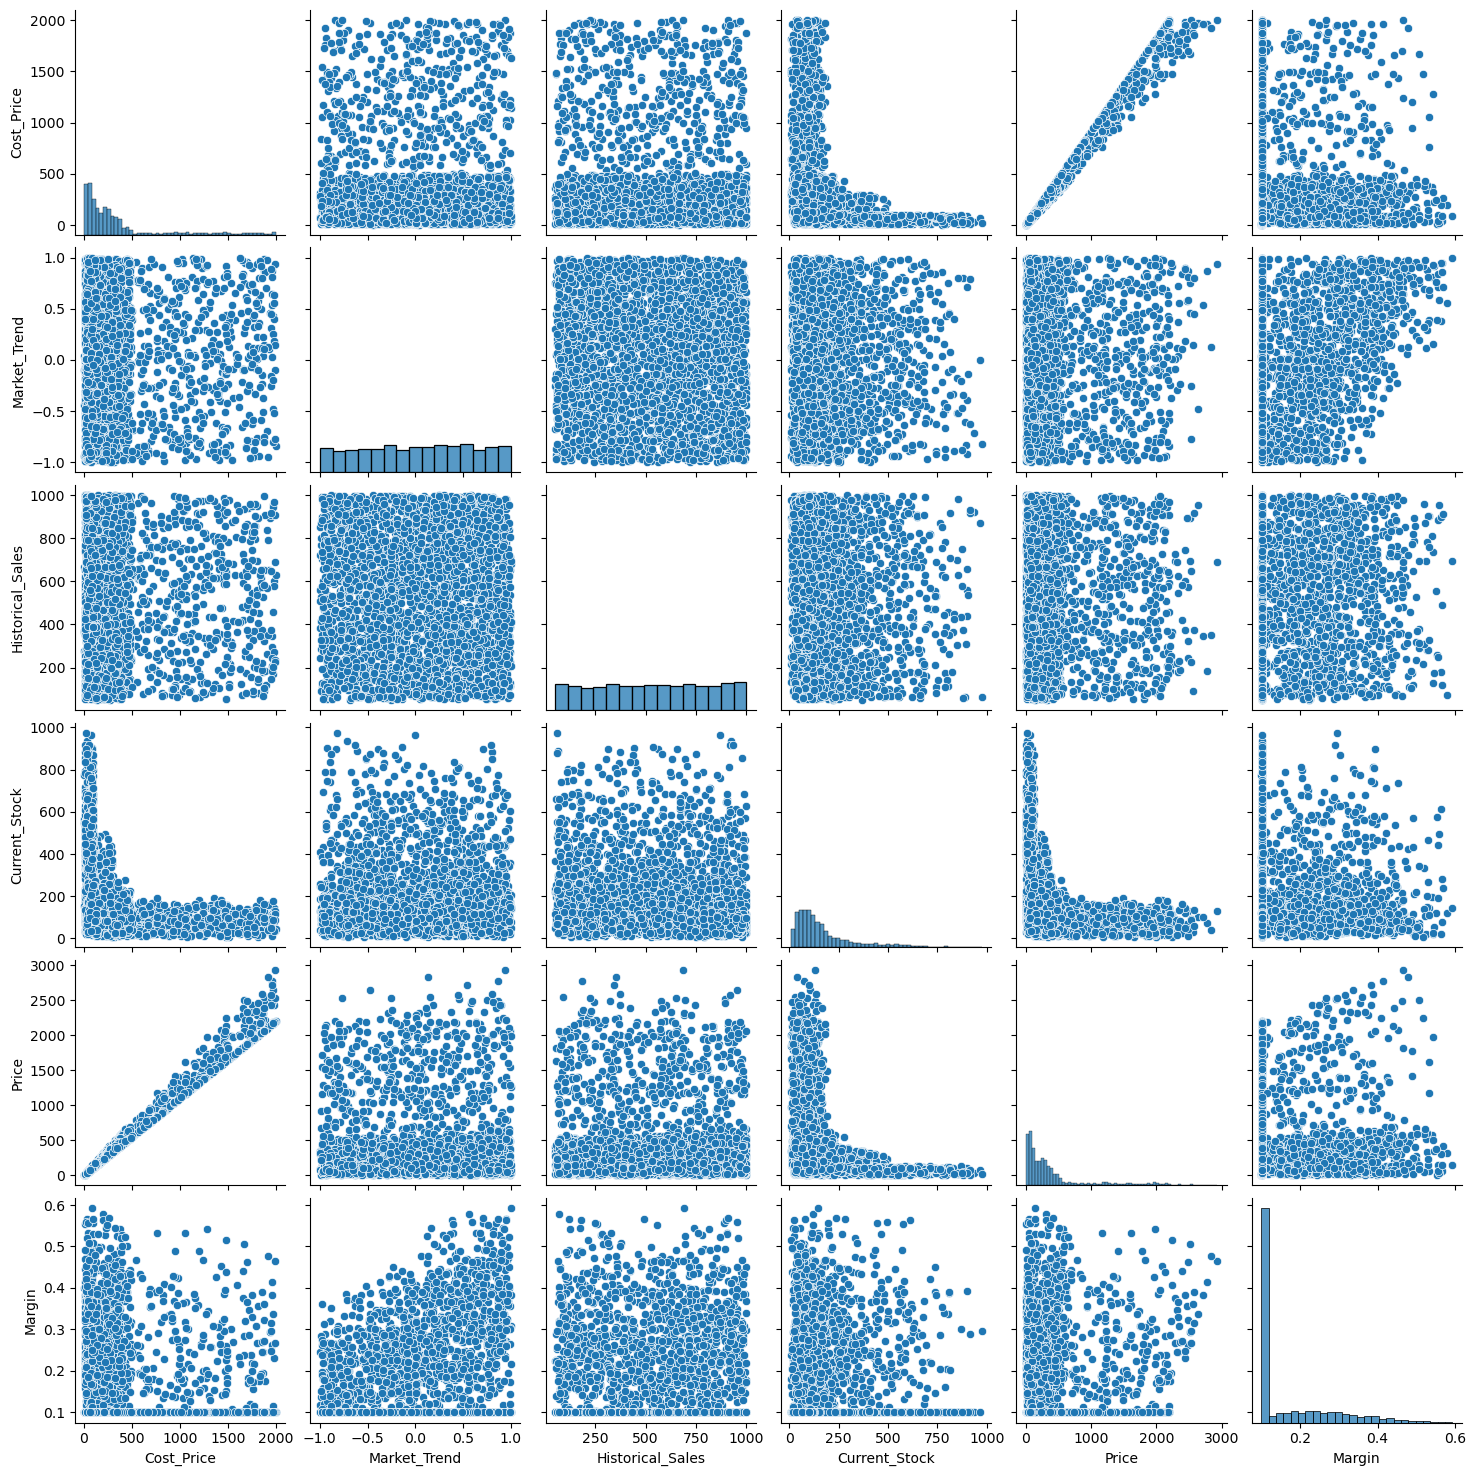

In [22]:
#creating a pairplot of the dataset
sns.pairplot(df_new, )

plt.show()

In [21]:
df_new.head()


,Category,Cost_Price,Season,Market_Trend,Historical_Sales,Current_Stock,Price,Margin
0,Sports,140.62,Fall,0.92,462,107,192.23,0.367017
1,Books,6.97,Spring,0.60,615,420,7.67,0.100430
2,Home & Kitchen,385.23,Spring,-0.08,788,51,423.75,0.099992
3,Books,9.06,Winter,-0.60,750,705,11.06,0.220751
4,Books,87.14,Winter,0.62,969,192,120.92,0.387652


In [29]:
#creating dummies for categorical variables
df_dummies = pd.get_dummies(df_new, drop_first=True)


In [31]:
df_dummies.head()

,Cost_Price,Market_Trend,Historical_Sales,Current_Stock,Price,Margin,Category_Clothing,Category_Electronics,Category_Home & Kitchen,Category_Sports,Season_Spring,Season_Summer,Season_Winter
0,140.62,0.92,462,107,192.23,0.367017,False,False,False,True,False,False,False
1,6.97,0.60,615,420,7.67,0.100430,False,False,False,False,True,False,False
2,385.23,-0.08,788,51,423.75,0.099992,False,False,True,False,True,False,False
3,9.06,-0.60,750,705,11.06,0.220751,False,False,False,False,False,False,True
4,87.14,0.62,969,192,120.92,0.387652,False,False,False,False,False,False,True


In [33]:
#checking the corelation of the variables
df_dummies.corr()

,Cost_Price,Market_Trend,Historical_Sales,Current_Stock,Price,Margin,Category_Clothing,Category_Electronics,Category_Home & Kitchen,Category_Sports,Season_Spring,Season_Summer,Season_Winter
Cost_Price,1.000000,0.012903,0.002537,-0.342091,0.993180,-0.004131,-0.213704,0.792105,-0.102295,-0.149410,-0.008337,0.011048,0.009952
Market_Trend,0.012903,1.000000,-0.021182,-0.023861,0.032276,0.267346,0.008942,-0.022820,-0.000833,0.038590,0.000806,-0.003873,0.009788
Historical_Sales,0.002537,-0.021182,1.000000,-0.040432,0.003543,0.012916,-0.011719,0.012981,0.012431,0.022872,-0.014526,0.004149,0.010868
Current_Stock,-0.342091,-0.023861,-0.040432,1.000000,-0.339837,0.005555,0.070497,-0.306271,-0.165819,-0.293688,0.027239,-0.017783,-0.002808
Price,0.993180,0.032276,0.003543,-0.339837,1.000000,0.067659,-0.214179,0.786889,-0.100330,-0.148077,-0.037213,-0.018418,0.042757
Margin,-0.004131,0.267346,0.012916,0.005555,0.067659,1.000000,-0.035569,-0.000761,0.013912,-0.011331,-0.410381,-0.399802,0.438328
Category_Clothing,-0.213704,0.008942,-0.011719,0.070497,-0.214179,-0.035569,1.000000,-0.250427,-0.236828,-0.250937,0.032146,-0.014270,-0.020202
Category_Electronics,0.792105,-0.022820,0.012981,-0.306271,0.786889,-0.000761,-0.250427,1.000000,-0.245357,-0.259974,-0.017091,0.003905,0.004635
Category_Home & Kitchen,-0.102295,-0.000833,0.012431,-0.165819,-0.100330,0.013912,-0.236828,-0.245357,1.000000,-0.245857,-0.017866,0.010661,0.004624
Category_Sports,-0.149410,0.038590,0.022872,-0.293688,-0.148077,-0.011331,-0.250937,-0.259974,-0.245857,1.000000,0.008147,0.010525,-0.015482


In [35]:
#loading seaborn
import seaborn as sns


In [37]:
#loading normalizer and preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer


In [39]:
df_dummies.columns

Index(['Cost_Price', 'Market_Trend', 'Historical_Sales', 'Current_Stock',
       'Price', 'Margin', 'Category_Clothing', 'Category_Electronics',
       'Category_Home & Kitchen', 'Category_Sports', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

In [41]:
df1 = df_dummies   #set with dummy variables


### Checking for null value and data types for each variables  

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cost_Price               3000 non-null   float64
 1   Market_Trend             3000 non-null   float64
 2   Historical_Sales         3000 non-null   int64  
 3   Current_Stock            3000 non-null   int64  
 4   Price                    3000 non-null   float64
 5   Margin                   3000 non-null   float64
 6   Category_Clothing        3000 non-null   bool   
 7   Category_Electronics     3000 non-null   bool   
 8   Category_Home & Kitchen  3000 non-null   bool   
 9   Category_Sports          3000 non-null   bool   
 10  Season_Spring            3000 non-null   bool   
 11  Season_Summer            3000 non-null   bool   
 12  Season_Winter            3000 non-null   bool   
dtypes: bool(7), float64(4), int64(2)
memory usage: 161.3 KB


In [45]:
#checking for any zero values
null_df1 = df.isnull().sum()
print(null_df1)

Category            0
Cost_Price          0
Competitor_Price    0
Demand_Level        0
Season              0
Promotion           0
Market_Trend        0
Historical_Sales    0
Initial_Stock       0
Current_Stock       0
Price               0
Margin              0
dtype: int64


In [23]:
#function to check for duplicates row and delete if any present
def duplicate(df1):
    if df.duplicated().sum()>0:
        print(start+'Dataframe contains duplicate values'+end, df1.duplicated().sum())
        df1.drop_duplicates(inplace=True, ignore_index=True)
        print('Details of dataframe after dropping duplicates rows')
        details(df1)
    else:
        print('Dataframe doesnt contain any duplicate rows')
        

### Analysing the Data

In [51]:
#row to columns switch 
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cost_Price,3000.0,347.609110,446.377031,5.350000,76.165000,198.290000,361.205000,1998.990000
Market_Trend,3000.0,0.023040,0.571070,-1.000000,-0.460000,0.040000,0.502500,1.000000
Historical_Sales,3000.0,531.769333,277.220135,51.000000,295.750000,533.500000,770.000000,1000.000000
Current_Stock,3000.0,182.003667,170.305716,6.000000,70.000000,122.000000,224.000000,974.000000
Price,3000.0,408.437317,527.802307,5.880000,88.712500,227.545000,422.897500,2925.000000
Margin,3000.0,0.175573,0.109828,0.099065,0.099999,0.100035,0.240727,0.593135


## Observations
1. Product ID and Product names are not used for analysis
2. Category and Seasons are not in this data statistics as they are categorical
3. Only high correlated variables used for machine learning model
4. cost_price: buying price range between 5.35 to 1999.0. Mean > Median, hence its right skewed.
5. market_trend: values range between -1 to 1. Mean < Median, hence slightly left skewed.
6. historical sales: sales range between 51 to 1000 items. Normally distributed as mean is almost equal to the median.
7. current_stock: stock ranges between 6 to 974 for various items. Mean > Median hence its right skewed.
8. price: selling price of items range from 5.88 to 2925. Mean> Median, mean almost double the median hence its highly right skewed.
9. margin: profit margin range from 9% to 59%. Mean > Median, mean almost double the media hence its highly right skewed. 

# Checking variable distribution skewness with a distplot

### Cost_price

Skewness is : 2.12537954247526


Text(0.5, 1.0, 'Analysis of Cost_Price - Skewness')

<Figure size 1200x600 with 0 Axes>

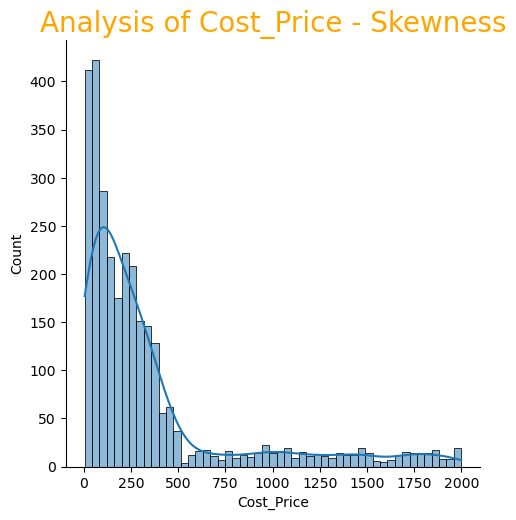

In [53]:
#creating a displot for cost price variable
plt.figure(figsize=(12,6))
print("Skewness is :",df1.Cost_Price.skew())
sns.displot(df1.Cost_Price, kde=True)
plt.title(f"Analysis of Cost_Price - Skewness" , fontsize=20,
          color="orange")

### Market Trend

Skewness is : -0.06274771895957179


Text(0.5, 1.0, 'Analysis of Market_Trend - Skewness')

<Figure size 1200x600 with 0 Axes>

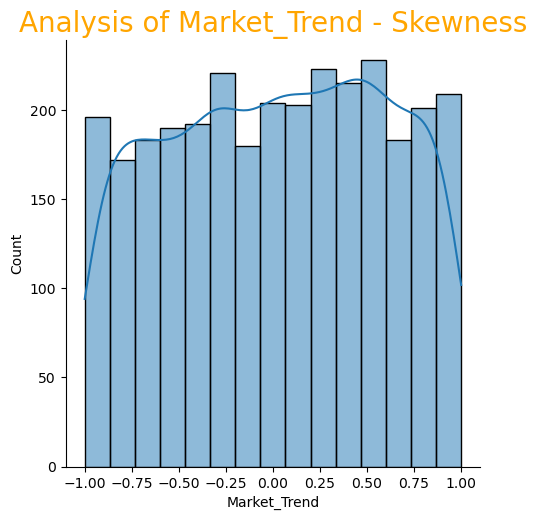

In [32]:
#creating a displot for market trend variable
plt.figure(figsize=(12,6))
print("Skewness is :",df1.Market_Trend.skew())
sns.displot(df1.Market_Trend, kde=True)
plt.title(f"Analysis of Market_Trend - Skewness" , fontsize=20,
          color="orange")

### Historical Sales

Skewness is : -0.02305823773872843


Text(0.5, 1.0, 'Analysis of Historical_Sales- Skewness')

<Figure size 1200x600 with 0 Axes>

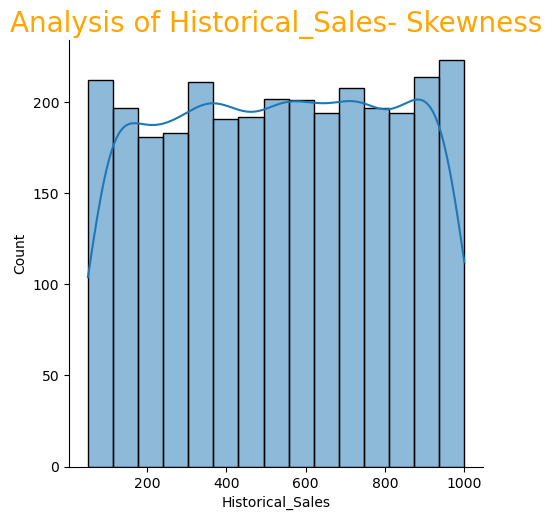

In [34]:
#creating a displot for historical sales variable
plt.figure(figsize=(12,6))
print("Skewness is :",df1.Historical_Sales.skew())
sns.displot(df1.Historical_Sales, kde=True)
plt.title(f"Analysis of Historical_Sales- Skewness" , fontsize=20,
          color="orange")

### Current Stock 

Skewness is : 1.8653378350592287


Text(0.5, 1.0, 'Analysis of Current_Stock- Skewness')

<Figure size 1200x600 with 0 Axes>

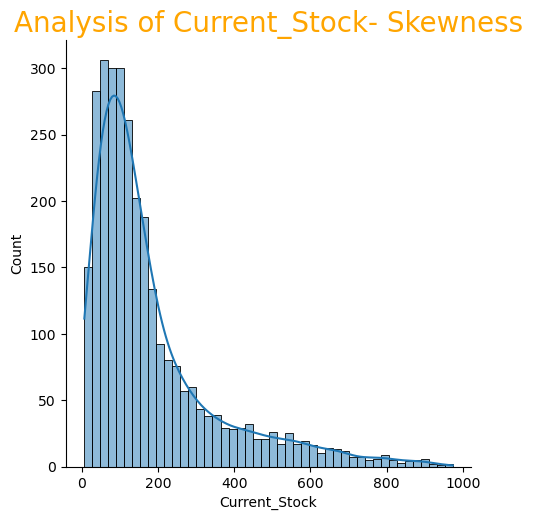

In [36]:
#creating a displot for current stock variable
plt.figure(figsize=(12,6))
print("Skewness is :",df1.Current_Stock.skew())
sns.displot(df1.Current_Stock, kde=True)
plt.title(f"Analysis of Current_Stock- Skewness" , fontsize=20,
          color="orange")

### Price

Skewness is : 2.178143755758012


Text(0.5, 1.0, 'Analysis of Price- Skewness')

<Figure size 1200x600 with 0 Axes>

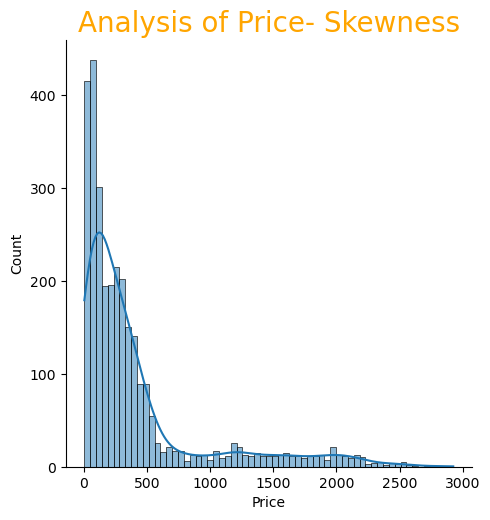

In [38]:
#creating a displot for price variable
plt.figure(figsize=(12,6))
print("Skewness is :",df1.Price.skew())
sns.displot(df1.Price, kde=True)
plt.title(f"Analysis of Price- Skewness" , fontsize=20,
          color="orange")

### Margin

Skewness is : 1.3541456750787133


Text(0.5, 1.0, 'Analysis of Margin- Skewness')

<Figure size 1200x600 with 0 Axes>

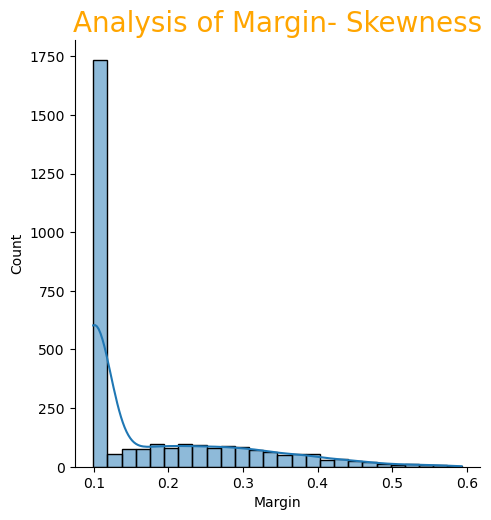

In [40]:
#creating a displot for margin variable
plt.figure(figsize=(12,6))
print("Skewness is :",df1.Margin.skew())
sns.displot(df1.Margin, kde=True)
plt.title(f"Analysis of Margin- Skewness" , fontsize=20,
          color="orange")

### Skewness Interpretation

#Skewness 
1. It can be seen that all variables except Market Trend (left skewness) and Historical Sales (Normally Distributed)have right skewness.
2. Most values lie towards the lowers end of the distribution.
3. Due to skewness, the features need scaling. 

### Looking for values in each column


In [44]:
#function to look for values in each column
def values_in_columns(df_new):
    start=''
    end=''
    for i in df_new.columns:
        print(start+'Column Name--->'+i+end)
        print('Number of Unique Values', df_new[i].nunique(),'\n')
        print('Count of each unique value \n', df_new[i].value_counts(), '\n')

In [45]:
values_in_columns(df_new)


Column Name--->Category
Number of Unique Values 5 

Count of each unique value 
 Category
Sports            620
Electronics       618
Books             613
Clothing          584
Home & Kitchen    565
Name: count, dtype: int64 

Column Name--->Cost_Price
Number of Unique Values 2917 

Count of each unique value 
 Cost_Price
82.60     3
46.21     3
79.72     3
89.87     2
49.56     2
         ..
86.11     1
10.16     1
135.21    1
88.94     1
118.70    1
Name: count, Length: 2917, dtype: int64 

Column Name--->Season
Number of Unique Values 4 

Count of each unique value 
 Season
Spring    787
Summer    757
Winter    731
Fall      725
Name: count, dtype: int64 

Column Name--->Market_Trend
Number of Unique Values 201 

Count of each unique value 
 Market_Trend
 0.56    27
 0.01    26
 0.22    26
 0.09    24
 0.32    23
         ..
-0.03     7
-0.50     7
-0.61     7
 1.00     6
-1.00     6
Name: count, Length: 201, dtype: int64 

Column Name--->Historical_Sales
Number of Unique Values 92

### Univariate Analysis - By Boxplot


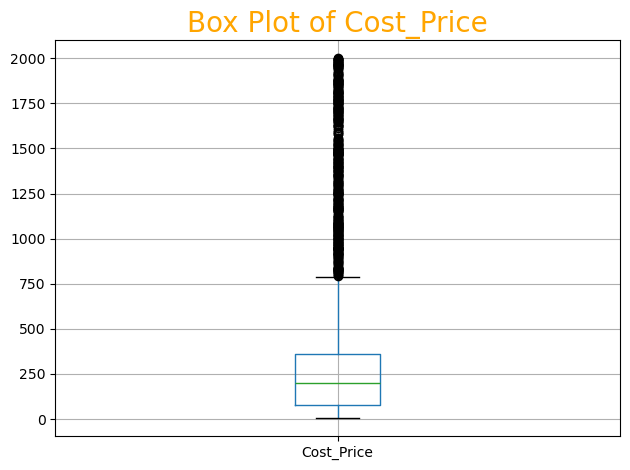

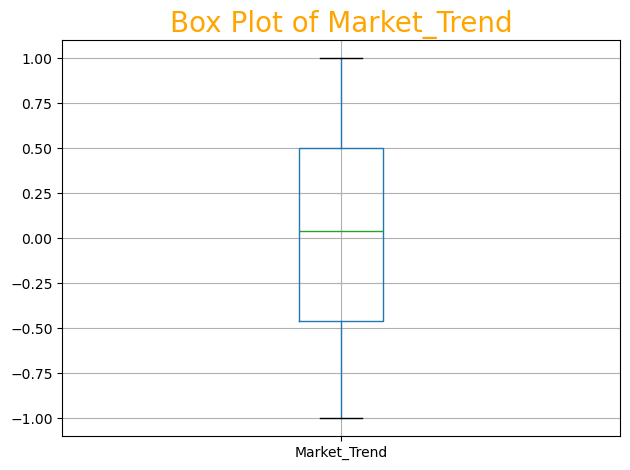

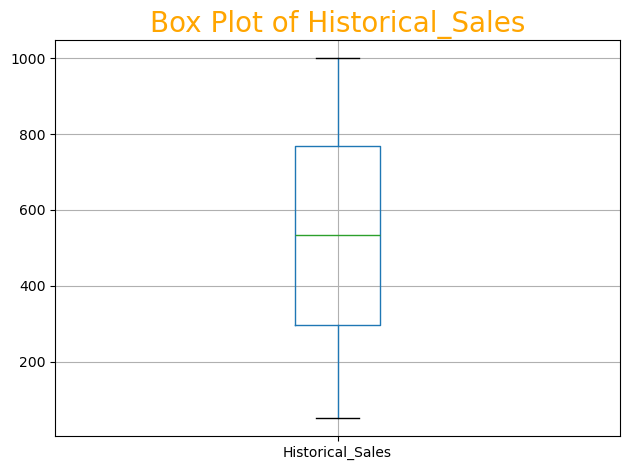

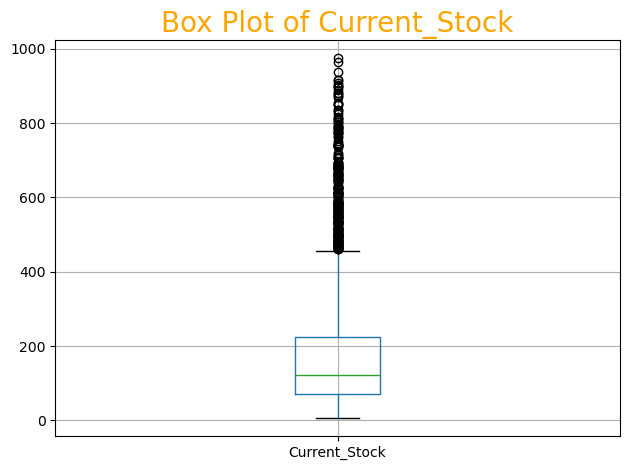

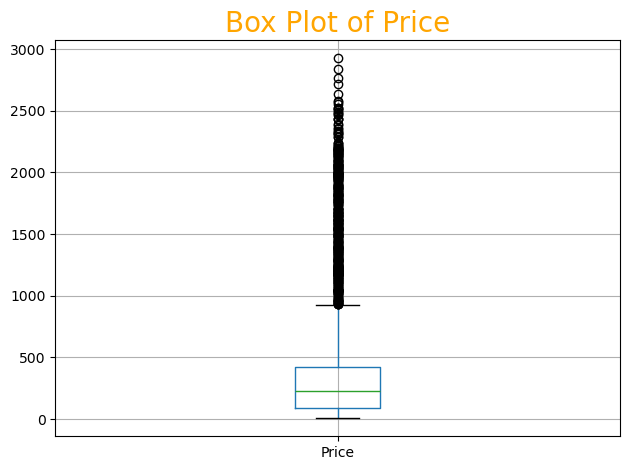

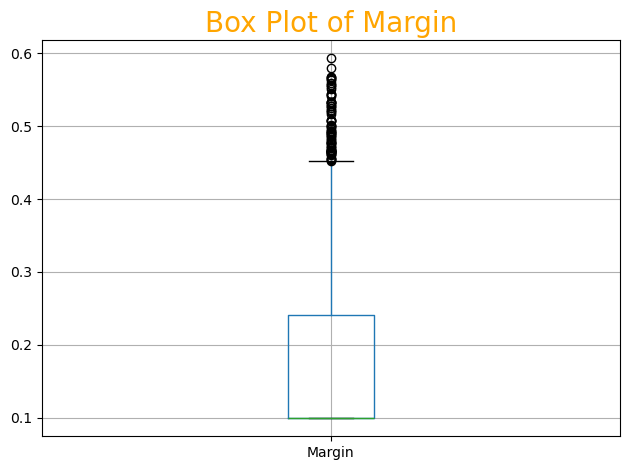

In [47]:

for i in df_new.drop(['Category', 'Season'],axis=1).columns:
    df_new.boxplot(column=i)
    plt.title(f'Box Plot of {i}',fontsize=20,color='orange')
    plt.tight_layout()
    plt.show()

## Lot of features are having outliers so a scaling techniques is required

# BiVariate Analysis

Text(0.5, 1.0, 'Pairplot')

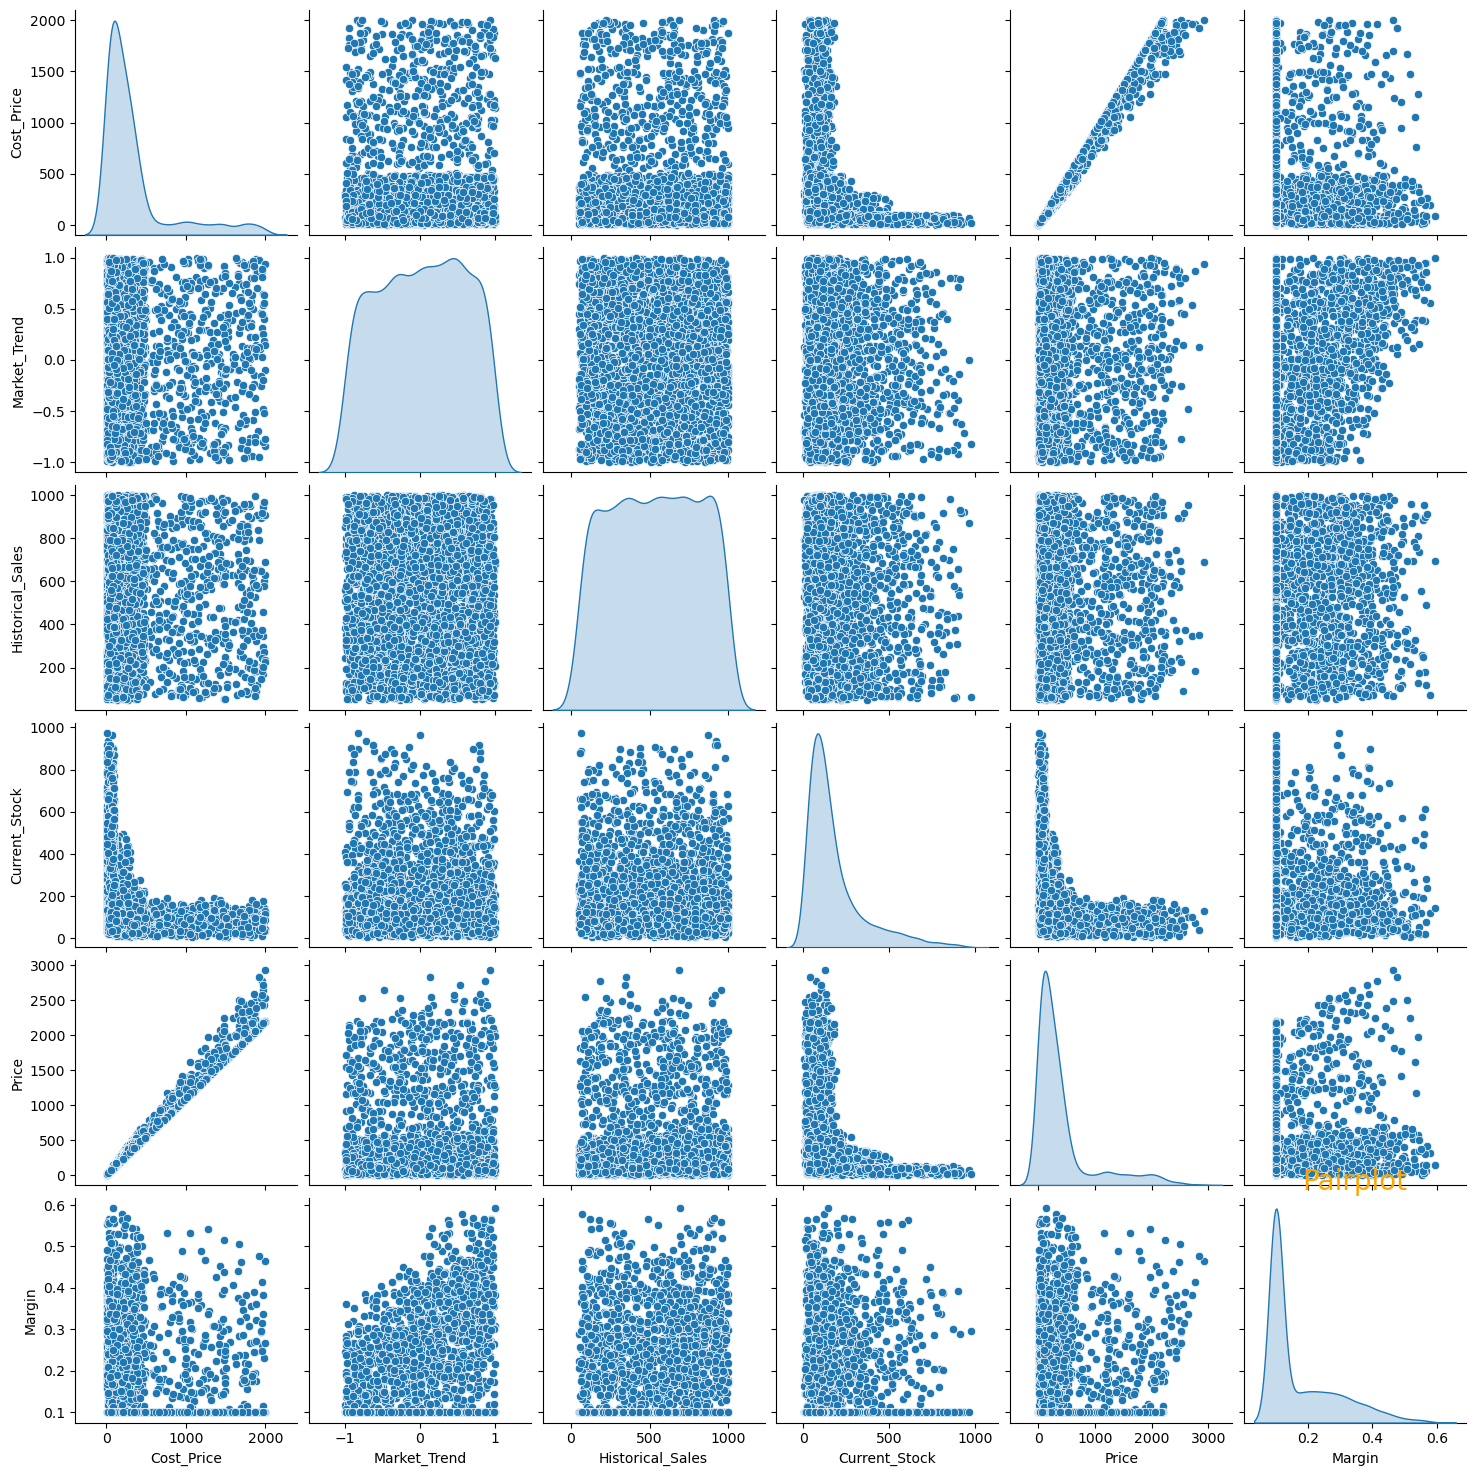

In [50]:
# plot two variables and examining bivariate plot of variables
sns.pairplot(df_new, diag_kind = 'kde')
plt.title(f"Pairplot" , fontsize=20,
          color="orange")

### Observations from the pairplot

Observations
1. Cost_price has no visible relation with margin (target variable) but can be seen having a linear relation with price variable suggesting collinearity in the dataset. 
So cannot use linear regression for this problem.
2. Other variables show skewness in the distribution.
3. It can be seen that most of the data is on the lower end of the ranges.


## Categorical Feature Selection Using Boxplot

<Axes: xlabel='Category', ylabel='Margin'>

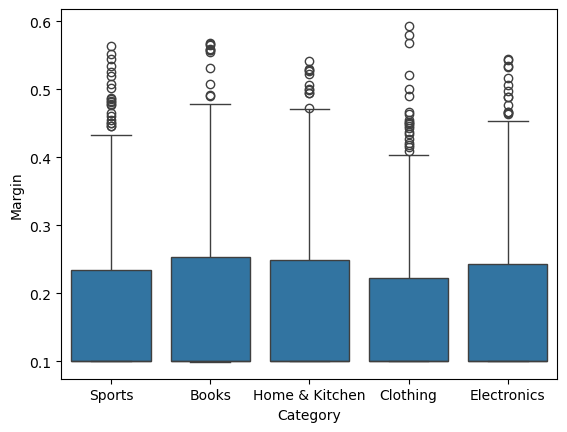

In [54]:
#generating a boxplot for category variable
sns.boxplot(x="Category", y="Margin", data=df_new)

### Variance can be seen in the price range for this feature. Margin varies with different categories hence feature can be used for prediction. 

<Axes: xlabel='Season', ylabel='Margin'>

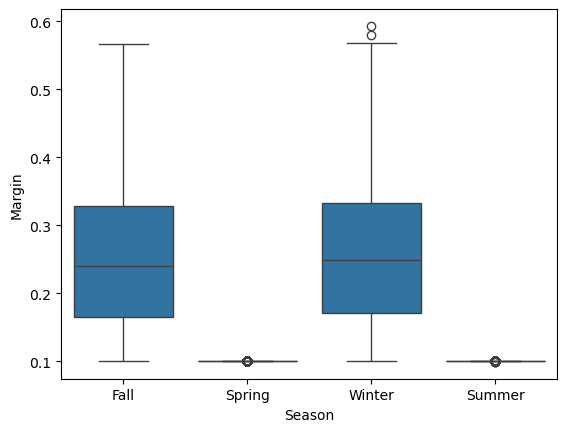

In [56]:
#generating a boxplot for season variable
sns.boxplot(x="Season", y="Margin", data=df_new)

### Variance can be seen in the price range for this feature. Margin varies in different seasons hence feature can be used for prediction. 

# Model Development

## Importing Libraries

In [81]:
from sklearn.model_selection import train_test_split
#importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [83]:
#installing xgboost
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
from xgboost.sklearn import XGBRegressor

## Splitting data into Train and Test Sets

It is necessary that we split the data into train and test sets before using scaling techniques, because we want the standardization scaling done using mean of the train set for the test set. 

In [89]:
# Creating x and y variables for Train and Test Sets
x = df1.drop(['Margin'],axis=1)
y= df1['Margin']


In [66]:
#Check dataframes
x.head()

,Cost_Price,Market_Trend,Historical_Sales,Current_Stock,Price,Category_Clothing,Category_Electronics,Category_Home & Kitchen,Category_Sports,Season_Spring,Season_Summer,Season_Winter
0,140.62,0.92,462,107,192.23,False,False,False,True,False,False,False
1,6.97,0.60,615,420,7.67,False,False,False,False,True,False,False
2,385.23,-0.08,788,51,423.75,False,False,True,False,True,False,False
3,9.06,-0.60,750,705,11.06,False,False,False,False,False,False,True
4,87.14,0.62,969,192,120.92,False,False,False,False,False,False,True


In [67]:
y.head()

0    0.367017
1    0.100430
2    0.099992
3    0.220751
4    0.387652
Name: Margin, dtype: float64

In [91]:
#spliting using train_testsplit function 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=1)

In [93]:
#checking the row distribution
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(1920, 12) (1920,)
(600, 12) (600,)
(480, 12) (480,)


## Function for MAPE and adjusted R2 calculation

In [95]:
#Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs(np.array(y_pred) - np.array(y_true)) / np.array(y_true), axis=0)
    
#Calculate adjR
def adjR(y_true, y_pred,p):
    R2=r2_score(y_true,y_pred)
    n=10
    return 1-(1-R2)*(n-1)/(n-p-1)

## Model Application

Model application and their performances compared

### Linear Regression 

In [75]:
# defining the model
LR1 = LinearRegression()
LR1.fit(x_train, y_train)

# Making Predictions
y_LR1_predtr= LR1.predict(x_train)
y_LR1_predvl= LR1.predict(x_val)
y_LR1_predte= LR1.predict(x_test)

LR1.coef_

array([-6.93237655e-04,  3.86834986e-02,  8.16062725e-06,  1.33289637e-06,
        5.85210021e-04, -1.55117325e-02, -9.05496398e-03, -1.08317076e-02,
       -1.17545998e-02, -1.20976985e-01, -1.22831679e-01,  4.65138489e-03])

In [76]:
# Performance on train data
LR1_tr_R2score=r2_score(y_train,y_LR1_predtr)
LR1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_LR1_predtr))
LR1_tr_MSE=mean_squared_error(y_train, y_LR1_predtr)
LR1_tr_MAE=mean_absolute_error(y_train, y_LR1_predtr)
LR1_tr_MAPE=mape(y_train, y_LR1_predtr)
LR1_tr_AR2=adjR(y_train, y_LR1_predtr,p=len(x.columns))

# Performance on val data
LR1_vl_R2score=r2_score(y_val,y_LR1_predvl)
LR1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_LR1_predvl))
LR1_vl_MSE=mean_squared_error(y_val, y_LR1_predvl)
LR1_vl_MAE=mean_absolute_error(y_val, y_LR1_predvl)
LR1_vl_MAPE=mape(y_val, y_LR1_predvl)
LR1_vl_AR2=adjR(y_val, y_LR1_predvl,p=len(x.columns))

# Performance on test data
LR1_te_R2score=r2_score(y_test,y_LR1_predte)
LR1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_LR1_predte))
LR1_te_MSE=mean_squared_error(y_test, y_LR1_predte)
LR1_te_MAE=mean_absolute_error(y_test, y_LR1_predte)
LR1_te_MAPE=mape(y_test, y_LR1_predte)
LR1_te_AR2=adjR(y_test, y_LR1_predte,p=len(x.columns))

model_comprsn=pd.DataFrame({'Algorithm':['Simple Linear Reg Model'],
                       'train Score':LR1_tr_R2score,'RMSE_tr': LR1_tr_RMSE, 'MSE_tr': LR1_tr_MSE, 'MAE_tr': LR1_tr_MAE,
                         "Mape_tr":LR1_tr_MAPE, "Adjusted_r2_tr":LR1_tr_AR2,
                        'Val Score':LR1_vl_R2score,'RMSE_vl': LR1_vl_RMSE, 'MSE_vl': LR1_vl_MSE, 'MAE_vl': LR1_vl_MAE,
                         "Mape_val":LR1_vl_MAPE, "Adjusted_r2_val":LR1_vl_AR2,
                      'test Score':LR1_te_R2score,'RMSE_te': LR1_te_RMSE, 'MSE_te': LR1_te_MSE, 'MAE_te': LR1_te_MAE,
                        "Mape_te":LR1_te_MAPE, "Adjusted_r2_te":LR1_te_AR2})
model_comprsn

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Mape_tr,Adjusted_r2_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,Mape_val,Adjusted_r2_val,test Score,RMSE_te,MSE_te,MAE_te,Mape_te,Adjusted_r2_te
0,Simple Linear Reg Model,0.66171,0.062829,0.003947,0.045856,0.288776,2.014869,0.661693,0.066296,0.004395,0.047979,0.297673,2.014922,0.65576,0.065689,0.004315,0.047947,0.313666,2.032721


### Lasso Regression

In [78]:
# defining the model
Lasso1 = Lasso(alpha=1)
Lasso1.fit(x_train, y_train)

# Making Predictions
y_Lasso1_predtr= Lasso1.predict(x_train)
y_Lasso1_predvl= Lasso1.predict(x_val)
y_Lasso1_predte= Lasso1.predict(x_test)

Lasso1.coef_

array([-0.00056398,  0.        ,  0.        ,  0.        ,  0.00048413,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ])

Most of the lasso coefficient are zero, we can even take them out as it don't effect the margin.

In [80]:
# Performance on train data
Lasso1_tr_R2score=r2_score(y_train,y_Lasso1_predtr)
Lasso1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_Lasso1_predtr))
Lasso1_tr_MSE=mean_squared_error(y_train, y_Lasso1_predtr)
Lasso1_tr_MAE=mean_absolute_error(y_train, y_Lasso1_predtr)
Lasso1_tr_MAPE=mape(y_train, y_Lasso1_predtr)
Lasso1_tr_AR2=adjR(y_train, y_Lasso1_predtr,p=len(x.columns))

# Performance on val data
Lasso1_vl_R2score=r2_score(y_val,y_Lasso1_predvl)
Lasso1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_Lasso1_predvl))
Lasso1_vl_MSE=mean_squared_error(y_val, y_Lasso1_predvl)
Lasso1_vl_MAE=mean_absolute_error(y_val, y_Lasso1_predvl)
Lasso1_vl_MAPE=mape(y_val, y_Lasso1_predvl)
Lasso1_vl_AR2=adjR(y_val, y_Lasso1_predvl,p=len(x.columns))

# Performance on test data
Lasso1_te_R2score=r2_score(y_test,y_Lasso1_predte)
Lasso1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_Lasso1_predte))
Lasso1_te_MSE=mean_squared_error(y_test, y_Lasso1_predte)
Lasso1_te_MAE=mean_absolute_error(y_test, y_Lasso1_predte)
Lasso1_te_MAPE=mape(y_test, y_Lasso1_predte)
Lasso1_te_AR2=adjR(y_test, y_Lasso1_predte,p=len(x.columns))

Lasso1_df=pd.DataFrame({'Algorithm':['SLinear-Reg (Lasso)'],
                       'train Score':Lasso1_tr_R2score,'RMSE_tr': Lasso1_tr_RMSE, 'MSE_tr': Lasso1_tr_MSE, 'MAE_tr': Lasso1_tr_MAE,
                         "Mape_tr":Lasso1_tr_MAPE, "Adjusted_r2_tr":Lasso1_tr_AR2,
                        'Val Score':Lasso1_vl_R2score,'RMSE_vl': Lasso1_vl_RMSE, 'MSE_vl': Lasso1_vl_MSE, 'MAE_vl': Lasso1_vl_MAE,
                         "Mape_val":Lasso1_vl_MAPE, "Adjusted_r2_val":Lasso1_vl_AR2,
                      'test Score':Lasso1_te_R2score,'RMSE_te': Lasso1_te_RMSE, 'MSE_te': Lasso1_te_MSE, 'MAE_te': Lasso1_te_MAE,
                        "Mape_te":Lasso1_te_MAPE, "Adjusted_r2_te":Lasso1_te_AR2})
model_comprsn = pd.concat([model_comprsn, Lasso1_df]).reset_index(drop=True)

model_comprsn

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Mape_tr,Adjusted_r2_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,Mape_val,Adjusted_r2_val,test Score,RMSE_te,MSE_te,MAE_te,Mape_te,Adjusted_r2_te
0,Simple Linear Reg Model,0.661710,0.062829,0.003947,0.045856,0.288776,2.014869,0.661693,0.066296,0.004395,0.047979,0.297673,2.014922,0.655760,0.065689,0.004315,0.047947,0.313666,2.032721
1,SLinear-Reg (Lasso),0.254273,0.093284,0.008702,0.074488,0.476757,3.237182,0.256190,0.098301,0.009663,0.078625,0.479366,3.231430,0.277708,0.095152,0.009054,0.075368,0.478237,3.166876


### Ridge Regression

In [82]:
# defining the model
Ridge1 = Ridge(alpha=0.5)
Ridge1.fit(x_train, y_train)

# Making Predictions
y_Ridge1_predtr= Ridge1.predict(x_train)
y_Ridge1_predvl= Ridge1.predict(x_val)
y_Ridge1_predte= Ridge1.predict(x_test)

Ridge1.coef_

array([-6.94653744e-04,  3.86291046e-02,  8.15430214e-06,  1.59166353e-06,
        5.86356303e-04, -1.53597192e-02, -8.81070035e-03, -1.06558285e-02,
       -1.15669454e-02, -1.20543174e-01, -1.22386494e-01,  4.90797772e-03])

In [83]:
# Performance on train data
Ridge1_tr_R2score=r2_score(y_train,y_Ridge1_predtr)
Ridge1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_Ridge1_predtr))
Ridge1_tr_MSE=mean_squared_error(y_train, y_Ridge1_predtr)
Ridge1_tr_MAE=mean_absolute_error(y_train, y_Ridge1_predtr)
Ridge1_tr_MAPE=mape(y_train, y_Ridge1_predtr)
Ridge1_tr_AR2=adjR(y_train, y_Ridge1_predtr,p=len(x.columns))

# Performance on val data
Ridge1_vl_R2score=r2_score(y_val,y_Ridge1_predvl)
Ridge1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_Ridge1_predvl))
Ridge1_vl_MSE=mean_squared_error(y_val, y_Ridge1_predvl)
Ridge1_vl_MAE=mean_absolute_error(y_val, y_Ridge1_predvl)
Ridge1_vl_MAPE=mape(y_val, y_Ridge1_predvl)
Ridge1_vl_AR2=adjR(y_val, y_Ridge1_predvl,p=len(x.columns))

# Performance on test data
Ridge1_te_R2score=r2_score(y_test,y_Ridge1_predte)
Ridge1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_Ridge1_predte))
Ridge1_te_MSE=mean_squared_error(y_test, y_Ridge1_predte)
Ridge1_te_MAE=mean_absolute_error(y_test, y_Ridge1_predte)
Ridge1_te_MAPE=mape(y_test, y_Ridge1_predte)
Ridge1_te_AR2=adjR(y_test, y_Ridge1_predte,p=len(x.columns))

Ridge1_df=pd.DataFrame({'Algorithm':['SLinear-Reg (Ridge)'],
                       'train Score':Ridge1_tr_R2score,'RMSE_tr': Ridge1_tr_RMSE, 'MSE_tr': Ridge1_tr_MSE, 'MAE_tr': Ridge1_tr_MAE,
                         "Mape_tr":Ridge1_tr_MAPE, "Adjusted_r2_tr":Ridge1_tr_AR2,
                        'Val Score':Ridge1_vl_R2score,'RMSE_vl': Ridge1_vl_RMSE, 'MSE_vl': Ridge1_vl_MSE, 'MAE_vl': Ridge1_vl_MAE,
                         "Mape_val":Ridge1_vl_MAPE, "Adjusted_r2_val":Ridge1_vl_AR2,
                      'test Score':Ridge1_te_R2score,'RMSE_te': Ridge1_te_RMSE, 'MSE_te': Ridge1_te_MSE, 'MAE_te': Ridge1_te_MAE,
                        "Mape_te":Ridge1_te_MAPE, "Adjusted_r2_te":Ridge1_te_AR2})
model_comprsn = pd.concat([model_comprsn, Ridge1_df]).reset_index(drop=True)

model_comprsn

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Mape_tr,Adjusted_r2_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,Mape_val,Adjusted_r2_val,test Score,RMSE_te,MSE_te,MAE_te,Mape_te,Adjusted_r2_te
0,Simple Linear Reg Model,0.661710,0.062829,0.003947,0.045856,0.288776,2.014869,0.661693,0.066296,0.004395,0.047979,0.297673,2.014922,0.655760,0.065689,0.004315,0.047947,0.313666,2.032721
1,SLinear-Reg (Lasso),0.254273,0.093284,0.008702,0.074488,0.476757,3.237182,0.256190,0.098301,0.009663,0.078625,0.479366,3.231430,0.277708,0.095152,0.009054,0.075368,0.478237,3.166876
2,SLinear-Reg (Ridge),0.661708,0.062829,0.003948,0.045850,0.288610,2.014877,0.661706,0.066294,0.004395,0.047972,0.297532,2.014883,0.655822,0.065683,0.004314,0.047934,0.313473,2.032534


### All regression models are performing poorly with values of 0.66, 0.25 and 0.66 and high adjusted r2 values. This was expected as our dataset is not linear and has collinearlity present. 
Now to check for other regressors

### KNN Regressor

In [86]:
# defining the model
knn1 = KNeighborsRegressor(n_neighbors=4,weights='distance')
knn1.fit(x_train, y_train)

# Making Predictions
y_knn1_predtr= knn1.predict(x_train)
y_knn1_predvl= knn1.predict(x_val)
y_knn1_predte= knn1.predict(x_test)
[186]
# Performance on train data
knn1_tr_R2score=r2_score(y_train,y_knn1_predtr)
knn1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_knn1_predtr))
knn1_tr_MSE=mean_squared_error(y_train, y_knn1_predtr)
knn1_tr_MAE=mean_absolute_error(y_train, y_knn1_predtr)
knn1_tr_MAPE=mape(y_train, y_knn1_predtr)
knn1_tr_AR2=adjR(y_train, y_knn1_predtr,p=len(x.columns))

# Performance on val data
knn1_vl_R2score=r2_score(y_val,y_knn1_predvl)
knn1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_knn1_predvl))
knn1_vl_MSE=mean_squared_error(y_val, y_knn1_predvl)
knn1_vl_MAE=mean_absolute_error(y_val, y_knn1_predvl)
knn1_vl_MAPE=mape(y_val, y_knn1_predvl)
knn1_vl_AR2=adjR(y_val, y_knn1_predvl,p=len(x.columns))

# Performance on test data
knn1_te_R2score=r2_score(y_test,y_knn1_predte)
knn1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_knn1_predte))
knn1_te_MSE=mean_squared_error(y_test, y_knn1_predte)
knn1_te_MAE=mean_absolute_error(y_test, y_knn1_predte)
knn1_te_MAPE=mape(y_test, y_knn1_predte)
knn1_te_AR2=adjR(y_test, y_knn1_predte,p=len(x.columns))

knn1_df=pd.DataFrame({'Algorithm':['KNN'],
                       'train Score':knn1_tr_R2score,'RMSE_tr': knn1_tr_RMSE, 'MSE_tr': knn1_tr_MSE, 'MAE_tr': knn1_tr_MAE,
                         "Mape_tr":knn1_tr_MAPE, "Adjusted_r2_tr":knn1_tr_AR2,
                        'Val Score':knn1_vl_R2score,'RMSE_vl': knn1_vl_RMSE, 'MSE_vl': knn1_vl_MSE, 'MAE_vl': knn1_vl_MAE,
                         "Mape_val":knn1_vl_MAPE, "Adjusted_r2_val":knn1_vl_AR2,
                      'test Score':knn1_te_R2score,'RMSE_te': knn1_te_RMSE, 'MSE_te': knn1_te_MSE, 'MAE_te': knn1_te_MAE,
                        "Mape_te":knn1_te_MAPE, "Adjusted_r2_te":knn1_te_AR2})
model_comprsn = pd.concat([model_comprsn, knn1_df]).reset_index(drop=True)

model_comprsn

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Mape_tr,Adjusted_r2_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,Mape_val,Adjusted_r2_val,test Score,RMSE_te,MSE_te,MAE_te,Mape_te,Adjusted_r2_te
0,Simple Linear Reg Model,0.661710,0.062829,0.003947,0.045856,0.288776,2.014869,0.661693,0.066296,0.004395,0.047979,0.297673,2.014922,0.655760,0.065689,0.004315,0.047947,0.313666,2.032721
1,SLinear-Reg (Lasso),0.254273,0.093284,0.008702,0.074488,0.476757,3.237182,0.256190,0.098301,0.009663,0.078625,0.479366,3.231430,0.277708,0.095152,0.009054,0.075368,0.478237,3.166876
2,SLinear-Reg (Ridge),0.661708,0.062829,0.003948,0.045850,0.288610,2.014877,0.661706,0.066294,0.004395,0.047972,0.297532,2.014883,0.655822,0.065683,0.004314,0.047934,0.313473,2.032534
3,KNN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.223361,0.100447,0.010090,0.069303,0.388892,3.329918,0.260048,0.096308,0.009275,0.066637,0.403614,3.219857


### KNN can be seen overfitting as it performs very well on the training set but on validation set and test set, the performance is very low. 

### Support Vector Regression

In [89]:
# defining the model
SVR1 = SVR(gamma='auto',C=10.0, epsilon=0.2,kernel='rbf')
SVR1.fit(x_train, y_train)

# Making Predictions
y_SVR1_predtr= SVR1.predict(x_train)
y_SVR1_predvl= SVR1.predict(x_val)
y_SVR1_predte= SVR1.predict(x_test)
[189]
# Performance on train data
SVR1_tr_R2score=r2_score(y_train,y_SVR1_predtr)
SVR1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_SVR1_predtr))
SVR1_tr_MSE=mean_squared_error(y_train, y_SVR1_predtr)
SVR1_tr_MAE=mean_absolute_error(y_train, y_SVR1_predtr)
SVR1_tr_MAPE=mape(y_train, y_SVR1_predtr)
SVR1_tr_AR2=adjR(y_train, y_SVR1_predtr,p=len(x.columns))

# Performance on val data
SVR1_vl_R2score=r2_score(y_val,y_SVR1_predvl)
SVR1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_SVR1_predvl))
SVR1_vl_MSE=mean_squared_error(y_val, y_SVR1_predvl)
SVR1_vl_MAE=mean_absolute_error(y_val, y_SVR1_predvl)
SVR1_vl_MAPE=mape(y_val, y_SVR1_predvl)
SVR1_vl_AR2=adjR(y_val, y_SVR1_predvl,p=len(x.columns))

# Performance on test data
SVR1_te_R2score=r2_score(y_test,y_SVR1_predte)
SVR1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_SVR1_predte))
SVR1_te_MSE=mean_squared_error(y_test, y_SVR1_predte)
SVR1_te_MAE=mean_absolute_error(y_test, y_SVR1_predte)
SVR1_te_MAPE=mape(y_test, y_SVR1_predte)
SVR1_te_AR2=adjR(y_test, y_SVR1_predte,p=len(x.columns))

SVR1_df=pd.DataFrame({'Algorithm':['SVR with kernel rbf'],
                       'train Score':SVR1_tr_R2score,'RMSE_tr': SVR1_tr_RMSE, 'MSE_tr': SVR1_tr_MSE, 'MAE_tr': SVR1_tr_MAE,
                         "Mape_tr":SVR1_tr_MAPE, "Adjusted_r2_tr":SVR1_tr_AR2,
                        'Val Score':SVR1_vl_R2score,'RMSE_vl': SVR1_vl_RMSE, 'MSE_vl': SVR1_vl_MSE, 'MAE_vl': SVR1_vl_MAE,
                         "Mape_val":SVR1_vl_MAPE, "Adjusted_r2_val":SVR1_vl_AR2,
                      'test Score':SVR1_te_R2score,'RMSE_te': SVR1_te_RMSE, 'MSE_te': SVR1_te_MSE, 'MAE_te': SVR1_te_MAE,
                        "Mape_te":SVR1_te_MAPE, "Adjusted_r2_te":SVR1_te_AR2})
model_comprsn = pd.concat([model_comprsn, SVR1_df]).reset_index(drop=True)

model_comprsn

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Mape_tr,Adjusted_r2_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,Mape_val,Adjusted_r2_val,test Score,RMSE_te,MSE_te,MAE_te,Mape_te,Adjusted_r2_te
0,Simple Linear Reg Model,0.661710,0.062829,0.003947,0.045856,0.288776,2.014869,0.661693,0.066296,0.004395,0.047979,0.297673,2.014922,0.655760,0.065689,0.004315,0.047947,0.313666,2.032721
1,SLinear-Reg (Lasso),0.254273,0.093284,0.008702,0.074488,0.476757,3.237182,0.256190,0.098301,0.009663,0.078625,0.479366,3.231430,0.277708,0.095152,0.009054,0.075368,0.478237,3.166876
2,SLinear-Reg (Ridge),0.661708,0.062829,0.003948,0.045850,0.288610,2.014877,0.661706,0.066294,0.004395,0.047972,0.297532,2.014883,0.655822,0.065683,0.004314,0.047934,0.313473,2.032534
3,KNN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.223361,0.100447,0.010090,0.069303,0.388892,3.329918,0.260048,0.096308,0.009275,0.066637,0.403614,3.219857
4,SVR with kernel rbf,-1.333553,0.165015,0.027230,0.150942,1.311353,8.000659,-1.116560,0.165823,0.027497,0.151230,1.298109,7.349681,-1.269809,0.168677,0.028452,0.154846,1.344932,7.809427


As it can be seen from the train score that negative R2 score suggest SVR is the worst model so far.

### Decision Tree 

In [92]:
# defining the model
DT1 = DecisionTreeRegressor()
DT1.fit(x_train, y_train)

# Making Predictions
y_DT1_predtr= DT1.predict(x_train)
y_DT1_predvl= DT1.predict(x_val)
y_DT1_predte= DT1.predict(x_test)


# Performance on train data
DT1_tr_R2score=r2_score(y_train,y_DT1_predtr)
DT1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_DT1_predtr))
DT1_tr_MSE=mean_squared_error(y_train, y_DT1_predtr)
DT1_tr_MAE=mean_absolute_error(y_train, y_DT1_predtr)
DT1_tr_MAPE=mape(y_train, y_DT1_predtr)
DT1_tr_AR2=adjR(y_train, y_DT1_predtr,p=len(x.columns))

# Performance on val data
DT1_vl_R2score=r2_score(y_val,y_DT1_predvl)
DT1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_DT1_predvl))
DT1_vl_MSE=mean_squared_error(y_val, y_DT1_predvl)
DT1_vl_MAE=mean_absolute_error(y_val, y_DT1_predvl)
DT1_vl_MAPE=mape(y_val, y_DT1_predvl)
DT1_vl_AR2=adjR(y_val, y_DT1_predvl,p=len(x.columns))

# Performance on test data
DT1_te_R2score=r2_score(y_test,y_DT1_predte)
DT1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_DT1_predte))
DT1_te_MSE=mean_squared_error(y_test, y_DT1_predte)
DT1_te_MAE=mean_absolute_error(y_test, y_DT1_predte)
DT1_te_MAPE=mape(y_test, y_DT1_predte)
DT1_te_AR2=adjR(y_test, y_DT1_predte,p=len(x.columns))

DT1_df=pd.DataFrame({'Algorithm':['Simple DT'],
                       'train Score':DT1_tr_R2score,'RMSE_tr': DT1_tr_RMSE, 'MSE_tr': DT1_tr_MSE, 'MAE_tr': DT1_tr_MAE,
                         "Mape_tr":DT1_tr_MAPE, "Adjusted_r2_tr":DT1_tr_AR2,
                        'Val Score':DT1_vl_R2score,'RMSE_vl': DT1_vl_RMSE, 'MSE_vl': DT1_vl_MSE, 'MAE_vl': DT1_vl_MAE,
                         "Mape_val":DT1_vl_MAPE, "Adjusted_r2_val":DT1_vl_AR2,
                      'test Score':DT1_te_R2score,'RMSE_te': DT1_te_RMSE, 'MSE_te': DT1_te_MSE, 'MAE_te': DT1_te_MAE,
                        "Mape_te":DT1_te_MAPE, "Adjusted_r2_te":DT1_te_AR2})
model_comprsn = pd.concat([model_comprsn, DT1_df]).reset_index(drop=True)

model_comprsn

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Mape_tr,Adjusted_r2_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,Mape_val,Adjusted_r2_val,test Score,RMSE_te,MSE_te,MAE_te,Mape_te,Adjusted_r2_te
0,Simple Linear Reg Model,0.661710,6.282898e-02,3.947481e-03,4.585629e-02,2.887758e-01,2.014869,0.661693,0.066296,0.004395,0.047979,0.297673,2.014922,0.655760,0.065689,0.004315,0.047947,0.313666,2.032721
1,SLinear-Reg (Lasso),0.254273,9.328367e-02,8.701843e-03,7.448802e-02,4.767574e-01,3.237182,0.256190,0.098301,0.009663,0.078625,0.479366,3.231430,0.277708,0.095152,0.009054,0.075368,0.478237,3.166876
2,SLinear-Reg (Ridge),0.661708,6.282922e-02,3.947511e-03,4.584977e-02,2.886105e-01,2.014877,0.661706,0.066294,0.004395,0.047972,0.297532,2.014883,0.655822,0.065683,0.004314,0.047934,0.313473,2.032534
3,KNN,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.223361,0.100447,0.010090,0.069303,0.388892,3.329918,0.260048,0.096308,0.009275,0.066637,0.403614,3.219857
4,SVR with kernel rbf,-1.333553,1.650154e-01,2.723007e-02,1.509417e-01,1.311353e+00,8.000659,-1.116560,0.165823,0.027497,0.151230,1.298109,7.349681,-1.269809,0.168677,0.028452,0.154846,1.344932,7.809427
5,Simple DT,1.000000,8.997672e-10,8.095810e-19,7.497466e-11,7.497595e-10,1.000000,0.348582,0.091994,0.008463,0.049959,0.233400,2.954253,0.377883,0.088307,0.007798,0.048093,0.217783,2.866352


Again the simple decision tree performs well on the training set. However, its performance on the validation and test set is very low. 

### Gradient Boosting

In [95]:
# defining the model
GB1=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22)
GB1.fit(x_train, y_train)

# Making Predictions
y_GB1_predtr= GB1.predict(x_train)
y_GB1_predvl= GB1.predict(x_val)
y_GB1_predte= GB1.predict(x_test)

# Performance on train data
GB1_tr_R2score=r2_score(y_train,y_GB1_predtr)
GB1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_GB1_predtr))
GB1_tr_MSE=mean_squared_error(y_train, y_GB1_predtr)
GB1_tr_MAE=mean_absolute_error(y_train, y_GB1_predtr)
GB1_tr_MAPE=mape(y_train, y_GB1_predtr)
GB1_tr_AR2=adjR(y_train, y_GB1_predtr,p=len(x.columns))

# Performance on val data
GB1_vl_R2score=r2_score(y_val,y_GB1_predvl)
GB1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_GB1_predvl))
GB1_vl_MSE=mean_squared_error(y_val, y_GB1_predvl)
GB1_vl_MAE=mean_absolute_error(y_val, y_GB1_predvl)
GB1_vl_MAPE=mape(y_val, y_GB1_predvl)
GB1_vl_AR2=adjR(y_val, y_GB1_predvl,p=len(x.columns))

# Performance on test data
GB1_te_R2score=r2_score(y_test,y_GB1_predte)
GB1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_GB1_predte))
GB1_te_MSE=mean_squared_error(y_test, y_GB1_predte)
GB1_te_MAE=mean_absolute_error(y_test, y_GB1_predte)
GB1_te_MAPE=mape(y_test, y_GB1_predte)
GB1_te_AR2=adjR(y_test, y_GB1_predte,p=len(x.columns))

GB1_df=pd.DataFrame({'Algorithm':['Gradient Boosting'],
                       'train Score':GB1_tr_R2score,'RMSE_tr': GB1_tr_RMSE, 'MSE_tr': GB1_tr_MSE, 'MAE_tr': GB1_tr_MAE,
                         "Mape_tr":GB1_tr_MAPE, "Adjusted_r2_tr":GB1_tr_AR2,
                        'Val Score':GB1_vl_R2score,'RMSE_vl': GB1_vl_RMSE, 'MSE_vl': GB1_vl_MSE, 'MAE_vl': GB1_vl_MAE,
                         "Mape_val":GB1_vl_MAPE, "Adjusted_r2_val":GB1_vl_AR2,
                      'test Score':GB1_te_R2score,'RMSE_te': GB1_te_RMSE, 'MSE_te': GB1_te_MSE, 'MAE_te': GB1_te_MAE,
                        "Mape_te":GB1_te_MAPE, "Adjusted_r2_te":GB1_te_AR2})
model_comprsn = pd.concat([model_comprsn, GB1_df]).reset_index(drop=True)

model_comprsn

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Mape_tr,Adjusted_r2_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,Mape_val,Adjusted_r2_val,test Score,RMSE_te,MSE_te,MAE_te,Mape_te,Adjusted_r2_te
0,Simple Linear Reg Model,0.661710,6.282898e-02,3.947481e-03,4.585629e-02,2.887758e-01,2.014869,0.661693,0.066296,0.004395,0.047979,0.297673,2.014922,0.655760,0.065689,0.004315,0.047947,0.313666,2.032721
1,SLinear-Reg (Lasso),0.254273,9.328367e-02,8.701843e-03,7.448802e-02,4.767574e-01,3.237182,0.256190,0.098301,0.009663,0.078625,0.479366,3.231430,0.277708,0.095152,0.009054,0.075368,0.478237,3.166876
2,SLinear-Reg (Ridge),0.661708,6.282922e-02,3.947511e-03,4.584977e-02,2.886105e-01,2.014877,0.661706,0.066294,0.004395,0.047972,0.297532,2.014883,0.655822,0.065683,0.004314,0.047934,0.313473,2.032534
3,KNN,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.223361,0.100447,0.010090,0.069303,0.388892,3.329918,0.260048,0.096308,0.009275,0.066637,0.403614,3.219857
4,SVR with kernel rbf,-1.333553,1.650154e-01,2.723007e-02,1.509417e-01,1.311353e+00,8.000659,-1.116560,0.165823,0.027497,0.151230,1.298109,7.349681,-1.269809,0.168677,0.028452,0.154846,1.344932,7.809427
5,Simple DT,1.000000,8.997672e-10,8.095810e-19,7.497466e-11,7.497595e-10,1.000000,0.348582,0.091994,0.008463,0.049959,0.233400,2.954253,0.377883,0.088307,0.007798,0.048093,0.217783,2.866352
6,Gradient Boosting,0.867151,3.937272e-02,1.550211e-03,2.467221e-02,1.415823e-01,1.398548,0.752565,0.056697,0.003215,0.036898,0.202873,1.742306,0.753883,0.055543,0.003085,0.033903,0.185240,1.738350


Gradient boosting has performed way better across different sets with R2 score of 0.86, 0.75 and 0.75 for train, validation and test sets respectively

### Random Forest

In [98]:
# defining the model
RF1=RandomForestRegressor()
RF1.fit(x_train, y_train)

# Making Predictions
y_RF1_predtr= RF1.predict(x_train)
y_RF1_predvl= RF1.predict(x_val)
y_RF1_predte= RF1.predict(x_test)

# Performance on train data
RF1_tr_R2score=r2_score(y_train,y_RF1_predtr)
RF1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_RF1_predtr))
RF1_tr_MSE=mean_squared_error(y_train, y_RF1_predtr)
RF1_tr_MAE=mean_absolute_error(y_train, y_RF1_predtr)
RF1_tr_MAPE=mape(y_train, y_RF1_predtr)
RF1_tr_AR2=adjR(y_train, y_RF1_predtr,p=len(x.columns))

# Performance on val data
RF1_vl_R2score=r2_score(y_val,y_RF1_predvl)
RF1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_RF1_predvl))
RF1_vl_MSE=mean_squared_error(y_val, y_RF1_predvl)
RF1_vl_MAE=mean_absolute_error(y_val, y_RF1_predvl)
RF1_vl_MAPE=mape(y_val, y_RF1_predvl)
RF1_vl_AR2=adjR(y_val, y_RF1_predvl,p=len(x.columns))

# Performance on test data
RF1_te_R2score=r2_score(y_test,y_RF1_predte)
RF1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_RF1_predte))
RF1_te_MSE=mean_squared_error(y_test, y_RF1_predte)
RF1_te_MAE=mean_absolute_error(y_test, y_RF1_predte)
RF1_te_MAPE=mape(y_test, y_RF1_predte)
RF1_te_AR2=adjR(y_test, y_RF1_predte,p=len(x.columns))

RF1_df=pd.DataFrame({'Algorithm':['Random Forest'],
                       'train Score':RF1_tr_R2score,'RMSE_tr': RF1_tr_RMSE, 'MSE_tr': RF1_tr_MSE, 'MAE_tr': RF1_tr_MAE,
                         "Mape_tr":RF1_tr_MAPE, "Adjusted_r2_tr":RF1_tr_AR2,
                        'Val Score':RF1_vl_R2score,'RMSE_vl': RF1_vl_RMSE, 'MSE_vl': RF1_vl_MSE, 'MAE_vl': RF1_vl_MAE,
                         "Mape_val":RF1_vl_MAPE, "Adjusted_r2_val":RF1_vl_AR2,
                      'test Score':RF1_te_R2score,'RMSE_te': RF1_te_RMSE, 'MSE_te': RF1_te_MSE, 'MAE_te': RF1_te_MAE,
                        "Mape_te":RF1_te_MAPE, "Adjusted_r2_te":RF1_te_AR2})
model_comprsn = pd.concat([model_comprsn, RF1_df]).reset_index(drop=True)

model_comprsn

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Mape_tr,Adjusted_r2_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,Mape_val,Adjusted_r2_val,test Score,RMSE_te,MSE_te,MAE_te,Mape_te,Adjusted_r2_te
0,Simple Linear Reg Model,0.661710,6.282898e-02,3.947481e-03,4.585629e-02,2.887758e-01,2.014869,0.661693,0.066296,0.004395,0.047979,0.297673,2.014922,0.655760,0.065689,0.004315,0.047947,0.313666,2.032721
1,SLinear-Reg (Lasso),0.254273,9.328367e-02,8.701843e-03,7.448802e-02,4.767574e-01,3.237182,0.256190,0.098301,0.009663,0.078625,0.479366,3.231430,0.277708,0.095152,0.009054,0.075368,0.478237,3.166876
2,SLinear-Reg (Ridge),0.661708,6.282922e-02,3.947511e-03,4.584977e-02,2.886105e-01,2.014877,0.661706,0.066294,0.004395,0.047972,0.297532,2.014883,0.655822,0.065683,0.004314,0.047934,0.313473,2.032534
3,KNN,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.223361,0.100447,0.010090,0.069303,0.388892,3.329918,0.260048,0.096308,0.009275,0.066637,0.403614,3.219857
4,SVR with kernel rbf,-1.333553,1.650154e-01,2.723007e-02,1.509417e-01,1.311353e+00,8.000659,-1.116560,0.165823,0.027497,0.151230,1.298109,7.349681,-1.269809,0.168677,0.028452,0.154846,1.344932,7.809427
5,Simple DT,1.000000,8.997672e-10,8.095810e-19,7.497466e-11,7.497595e-10,1.000000,0.348582,0.091994,0.008463,0.049959,0.233400,2.954253,0.377883,0.088307,0.007798,0.048093,0.217783,2.866352
6,Gradient Boosting,0.867151,3.937272e-02,1.550211e-03,2.467221e-02,1.415823e-01,1.398548,0.752565,0.056697,0.003215,0.036898,0.202873,1.742306,0.753883,0.055543,0.003085,0.033903,0.185240,1.738350
7,Random Forest,0.948153,2.459668e-02,6.049968e-04,1.366763e-02,6.644999e-02,1.155540,0.607276,0.071429,0.005102,0.040949,0.196869,2.178171,0.631289,0.067984,0.004622,0.037930,0.184176,2.106134


Random forest model has performed very well on the train data. However, its performance on test and validation data is very low, unacceptable. It has performed worse than Gradient Boosting. It shows overfitting characteristics with high score on train data.

### ADA Boost

In [101]:
# defining the model
ADAB=AdaBoostRegressor(DecisionTreeRegressor(random_state=8))
ADAB.fit(x_train, y_train)

# Making Predictions
y_ADAB_predtr= ADAB.predict(x_train)
y_ADAB_predvl= ADAB.predict(x_val)
y_ADAB_predte= ADAB.predict(x_test)

# Performance on train data
ADAB_tr_R2score=r2_score(y_train,y_ADAB_predtr)
ADAB_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_ADAB_predtr))
ADAB_tr_MSE=mean_squared_error(y_train, y_ADAB_predtr)
ADAB_tr_MAE=mean_absolute_error(y_train, y_ADAB_predtr)
ADAB_tr_MAPE=mape(y_train, y_ADAB_predtr)
ADAB_tr_AR2=adjR(y_train, y_ADAB_predtr,p=len(x.columns))

# Performance on val data
ADAB_vl_R2score=r2_score(y_val,y_ADAB_predvl)
ADAB_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_ADAB_predvl))
ADAB_vl_MSE=mean_squared_error(y_val, y_ADAB_predvl)
ADAB_vl_MAE=mean_absolute_error(y_val, y_ADAB_predvl)
ADAB_vl_MAPE=mape(y_val, y_ADAB_predvl)
ADAB_vl_AR2=adjR(y_val, y_ADAB_predvl,p=len(x.columns))

# Performance on test data
ADAB_te_R2score=r2_score(y_test,y_ADAB_predte)
ADAB_te_RMSE=np.sqrt(mean_squared_error(y_test, y_ADAB_predte))
ADAB_te_MSE=mean_squared_error(y_test, y_ADAB_predte)
ADAB_te_MAE=mean_absolute_error(y_test, y_ADAB_predte)
ADAB_te_MAPE=mape(y_test, y_ADAB_predte)
ADAB_te_AR2=adjR(y_test, y_ADAB_predte,p=len(x.columns))

ADAB_df=pd.DataFrame({'Algorithm':['ADA Boost'],
                       'train Score':ADAB_tr_R2score,'RMSE_tr': ADAB_tr_RMSE, 'MSE_tr': ADAB_tr_MSE, 'MAE_tr': ADAB_tr_MAE,
                         "Mape_tr":ADAB_tr_MAPE, "Adjusted_r2_tr":ADAB_tr_AR2,
                        'Val Score':ADAB_vl_R2score,'RMSE_vl': ADAB_vl_RMSE, 'MSE_vl': ADAB_vl_MSE, 'MAE_vl': ADAB_vl_MAE,
                         "Mape_val":ADAB_vl_MAPE, "Adjusted_r2_val":ADAB_vl_AR2,
                      'test Score':ADAB_te_R2score,'RMSE_te': ADAB_te_RMSE, 'MSE_te': ADAB_te_MSE, 'MAE_te': ADAB_te_MAE,
                        "Mape_te":ADAB_te_MAPE, "Adjusted_r2_te":ADAB_te_AR2})
model_comprsn = pd.concat([model_comprsn, ADAB_df]).reset_index(drop=True)

model_comprsn

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Mape_tr,Adjusted_r2_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,Mape_val,Adjusted_r2_val,test Score,RMSE_te,MSE_te,MAE_te,Mape_te,Adjusted_r2_te
0,Simple Linear Reg Model,0.661710,6.282898e-02,3.947481e-03,4.585629e-02,2.887758e-01,2.014869,0.661693,0.066296,0.004395,0.047979,0.297673,2.014922,0.655760,0.065689,0.004315,0.047947,0.313666,2.032721
1,SLinear-Reg (Lasso),0.254273,9.328367e-02,8.701843e-03,7.448802e-02,4.767574e-01,3.237182,0.256190,0.098301,0.009663,0.078625,0.479366,3.231430,0.277708,0.095152,0.009054,0.075368,0.478237,3.166876
2,SLinear-Reg (Ridge),0.661708,6.282922e-02,3.947511e-03,4.584977e-02,2.886105e-01,2.014877,0.661706,0.066294,0.004395,0.047972,0.297532,2.014883,0.655822,0.065683,0.004314,0.047934,0.313473,2.032534
3,KNN,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.223361,0.100447,0.010090,0.069303,0.388892,3.329918,0.260048,0.096308,0.009275,0.066637,0.403614,3.219857
4,SVR with kernel rbf,-1.333553,1.650154e-01,2.723007e-02,1.509417e-01,1.311353e+00,8.000659,-1.116560,0.165823,0.027497,0.151230,1.298109,7.349681,-1.269809,0.168677,0.028452,0.154846,1.344932,7.809427
5,Simple DT,1.000000,8.997672e-10,8.095810e-19,7.497466e-11,7.497595e-10,1.000000,0.348582,0.091994,0.008463,0.049959,0.233400,2.954253,0.377883,0.088307,0.007798,0.048093,0.217783,2.866352
6,Gradient Boosting,0.867151,3.937272e-02,1.550211e-03,2.467221e-02,1.415823e-01,1.398548,0.752565,0.056697,0.003215,0.036898,0.202873,1.742306,0.753883,0.055543,0.003085,0.033903,0.185240,1.738350
7,Random Forest,0.948153,2.459668e-02,6.049968e-04,1.366763e-02,6.644999e-02,1.155540,0.607276,0.071429,0.005102,0.040949,0.196869,2.178171,0.631289,0.067984,0.004622,0.037930,0.184176,2.106134
8,ADA Boost,0.999988,3.750914e-04,1.406936e-07,2.604131e-05,2.176285e-04,1.000036,0.615038,0.070719,0.005001,0.040009,0.185063,2.154886,0.661616,0.065128,0.004242,0.035712,0.166437,2.015151


ADA Boost has shown good performance so far on the given dataset with R2 score of 0.99, 0.65 and 0.65. Again overfitting on train data. 


### XGBoost

In [104]:
# defining the model
XGB=XGBRegressor(n_estimators=150,max_depth=5,random_state=7)
XGB.fit(x_train, y_train)

# Making Predictions
y_XGB_predtr= XGB.predict(x_train)
y_XGB_predvl= XGB.predict(x_val)
y_XGB_predte= XGB.predict(x_test)

# Performance on train data
XGB_tr_R2score=r2_score(y_train,y_XGB_predtr)
XGB_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_XGB_predtr))
XGB_tr_MSE=mean_squared_error(y_train, y_XGB_predtr)
XGB_tr_MAE=mean_absolute_error(y_train, y_XGB_predtr)
XGB_tr_MAPE=mape(y_train, y_XGB_predtr)
XGB_tr_AR2=adjR(y_train, y_XGB_predtr,p=len(x.columns))

# Performance on val data
XGB_vl_R2score=r2_score(y_val,y_XGB_predvl)
XGB_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_XGB_predvl))
XGB_vl_MSE=mean_squared_error(y_val, y_XGB_predvl)
XGB_vl_MAE=mean_absolute_error(y_val, y_XGB_predvl)
XGB_vl_MAPE=mape(y_val, y_XGB_predvl)
XGB_vl_AR2=adjR(y_val, y_XGB_predvl,p=len(x.columns))

# Performance on test data
XGB_te_R2score=r2_score(y_test,y_XGB_predte)
XGB_te_RMSE=np.sqrt(mean_squared_error(y_test, y_XGB_predte))
XGB_te_MSE=mean_squared_error(y_test, y_XGB_predte)
XGB_te_MAE=mean_absolute_error(y_test, y_XGB_predte)
XGB_te_MAPE=mape(y_test, y_XGB_predte)
XGB_te_AR2=adjR(y_test, y_XGB_predte,p=len(x.columns))

XGB_df=pd.DataFrame({'Algorithm':['XGBoost'],
                       'train Score':XGB_tr_R2score,'RMSE_tr': XGB_tr_RMSE, 'MSE_tr': XGB_tr_MSE, 'MAE_tr': XGB_tr_MAE,
                         "Mape_tr":XGB_tr_MAPE, "Adjusted_r2_tr":XGB_tr_AR2,
                        'Val Score':XGB_vl_R2score,'RMSE_vl': XGB_vl_RMSE, 'MSE_vl': XGB_vl_MSE, 'MAE_vl': XGB_vl_MAE,
                         "Mape_val":XGB_vl_MAPE, "Adjusted_r2_val":XGB_vl_AR2,
                      'test Score':XGB_te_R2score,'RMSE_te': XGB_te_RMSE, 'MSE_te': XGB_te_MSE, 'MAE_te': XGB_te_MAE,
                        "Mape_te":XGB_te_MAPE, "Adjusted_r2_te":XGB_te_AR2})
model_comprsn = pd.concat([model_comprsn, XGB_df]).reset_index(drop=True)

model_comprsn

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Mape_tr,Adjusted_r2_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,Mape_val,Adjusted_r2_val,test Score,RMSE_te,MSE_te,MAE_te,Mape_te,Adjusted_r2_te
0,Simple Linear Reg Model,0.661710,6.282898e-02,3.947481e-03,4.585629e-02,2.887758e-01,2.014869,0.661693,0.066296,0.004395,0.047979,0.297673,2.014922,0.655760,0.065689,0.004315,0.047947,0.313666,2.032721
1,SLinear-Reg (Lasso),0.254273,9.328367e-02,8.701843e-03,7.448802e-02,4.767574e-01,3.237182,0.256190,0.098301,0.009663,0.078625,0.479366,3.231430,0.277708,0.095152,0.009054,0.075368,0.478237,3.166876
2,SLinear-Reg (Ridge),0.661708,6.282922e-02,3.947511e-03,4.584977e-02,2.886105e-01,2.014877,0.661706,0.066294,0.004395,0.047972,0.297532,2.014883,0.655822,0.065683,0.004314,0.047934,0.313473,2.032534
3,KNN,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.223361,0.100447,0.010090,0.069303,0.388892,3.329918,0.260048,0.096308,0.009275,0.066637,0.403614,3.219857
4,SVR with kernel rbf,-1.333553,1.650154e-01,2.723007e-02,1.509417e-01,1.311353e+00,8.000659,-1.116560,0.165823,0.027497,0.151230,1.298109,7.349681,-1.269809,0.168677,0.028452,0.154846,1.344932,7.809427
5,Simple DT,1.000000,8.997672e-10,8.095810e-19,7.497466e-11,7.497595e-10,1.000000,0.348582,0.091994,0.008463,0.049959,0.233400,2.954253,0.377883,0.088307,0.007798,0.048093,0.217783,2.866352
6,Gradient Boosting,0.867151,3.937272e-02,1.550211e-03,2.467221e-02,1.415823e-01,1.398548,0.752565,0.056697,0.003215,0.036898,0.202873,1.742306,0.753883,0.055543,0.003085,0.033903,0.185240,1.738350
7,Random Forest,0.948153,2.459668e-02,6.049968e-04,1.366763e-02,6.644999e-02,1.155540,0.607276,0.071429,0.005102,0.040949,0.196869,2.178171,0.631289,0.067984,0.004622,0.037930,0.184176,2.106134
8,ADA Boost,0.999988,3.750914e-04,1.406936e-07,2.604131e-05,2.176285e-04,1.000036,0.615038,0.070719,0.005001,0.040009,0.185063,2.154886,0.661616,0.065128,0.004242,0.035712,0.166437,2.015151
9,XGBoost,0.994614,7.927381e-03,6.284337e-05,5.126830e-03,3.283044e-02,1.016157,0.821284,0.048185,0.002322,0.030927,0.165367,1.536149,0.801738,0.049852,0.002485,0.029996,0.162254,1.594787


XGboost has performed the best with good R2 score across different sets. R2 Scores: Train = 0.99, Val = 0.82, Test = 0.80

### Model Performance Summary

Three of the best-performing machine learning models for our data set are Gradient Boost, and XGBoost with regression models performing poorly.
SVM performed the worse showing negative train score leading to non-learning. 
Some of the methods have shown overfitting with the likes of RandomForest and KNN.
We will use XGBoost for hyperparameter optimization to further improve its performance. 

## Feature Importance 

Plot of Important features used by this model

In [77]:
from xgboost import plot_importance

In [97]:
# defining the model
XGB=XGBRegressor(n_estimators=150,max_depth=5,random_state=7)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=7, ...)

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

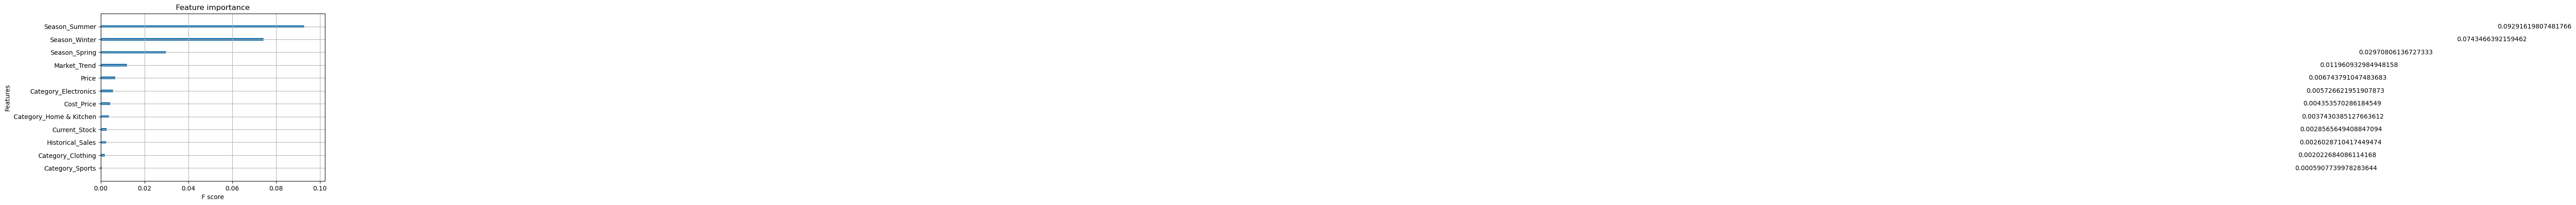

In [101]:
# plot feature importance based on gain
plt.figure(figsize=(10,6))
plot_importance(XGB, importance_type = 'gain')

plt.show()

## Hyperparameter Optimization

### Tuning using RandomSearchCV

In [116]:
param_gridX = {
    'colsample_bytree': [0.3,0.4,0.5,0.7],
    'learning_rate': [0.10,0.15,0.25,0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'min_child_weight': [1,3,5,7],
    'n_estimators':  [200,400,600],}

XGB_test=XGBRegressor(random_state=7)

grid_searchX = RandomizedSearchCV(estimator = XGB_test, param_distributions = param_gridX, 
                          cv = None, verbose = 1, n_jobs=1)
grid_searchX.fit(x_train,y_train)
grid_searchX.best_score_,grid_searchX.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


(0.7317583343498136,
 {'n_estimators': 400,
  'min_child_weight': 3,
  'max_depth': 8,
  'learning_rate': 0.15,
  'gamma': 0.0,
  'colsample_bytree': 0.5})

### Using randomized parameters to build model again

In [118]:
# defining the model
XGB1=XGBRegressor(n_estimators=600,min_child_weight= 5,learning_rate = 0.3,gamma = 0.0, colsample_bytree= 0.7, max_depth=5,random_state=7)
XGB1.fit(x_train, y_train)

# Making Predictions
y_XGB1_predtr= XGB1.predict(x_train)
y_XGB1_predvl= XGB1.predict(x_val)
y_XGB1_predte= XGB1.predict(x_test)

# Performance on train data
XGB1_tr_R2score=r2_score(y_train,y_XGB1_predtr)
XGB1_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_XGB1_predtr))
XGB1_tr_MSE=mean_squared_error(y_train, y_XGB1_predtr)
XGB1_tr_MAE=mean_absolute_error(y_train, y_XGB1_predtr)
XGB1_tr_MAPE=mape(y_train, y_XGB1_predtr)
XGB1_tr_AR2=adjR(y_train, y_XGB1_predtr,p=len(x.columns))

# Performance on val data
XGB1_vl_R2score=r2_score(y_val,y_XGB1_predvl)
XGB1_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_XGB1_predvl))
XGB1_vl_MSE=mean_squared_error(y_val, y_XGB1_predvl)
XGB1_vl_MAE=mean_absolute_error(y_val, y_XGB1_predvl)
XGB1_vl_MAPE=mape(y_val, y_XGB1_predvl)
XGB1_vl_AR2=adjR(y_val, y_XGB1_predvl,p=len(x.columns))

# Performance on test data
XGB1_te_R2score=r2_score(y_test,y_XGB1_predte)
XGB1_te_RMSE=np.sqrt(mean_squared_error(y_test, y_XGB1_predte))
XGB1_te_MSE=mean_squared_error(y_test, y_XGB1_predte)
XGB1_te_MAE=mean_absolute_error(y_test, y_XGB1_predte)
XGB1_te_MAPE=mape(y_test, y_XGB1_predte)
XGB1_te_AR2=adjR(y_test, y_XGB1_predte,p=len(x.columns))

XGB1_df=pd.DataFrame({'Algorithm':['XGBoostWRandomSearch'],
                       'train Score':XGB1_tr_R2score,'RMSE_tr': XGB1_tr_RMSE, 'MSE_tr': XGB1_tr_MSE, 'MAE_tr': XGB1_tr_MAE,
                         "Mape_tr":XGB1_tr_MAPE, "Adjusted_r2_tr":XGB1_tr_AR2,
                        'Val Score':XGB1_vl_R2score,'RMSE_vl': XGB1_vl_RMSE, 'MSE_vl': XGB1_vl_MSE, 'MAE_vl': XGB1_vl_MAE,
                         "Mape_val":XGB1_vl_MAPE, "Adjusted_r2_val":XGB1_vl_AR2,
                      'test Score':XGB1_te_R2score,'RMSE_te': XGB1_te_RMSE, 'MSE_te': XGB1_te_MSE, 'MAE_te': XGB1_te_MAE,
                        "Mape_te":XGB1_te_MAPE, "Adjusted_r2_te":XGB1_te_AR2})
model_comprsn = pd.concat([model_comprsn, XGB1_df]).reset_index(drop=True)

model_comprsn

,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Mape_tr,Adjusted_r2_tr,Val Score,RMSE_vl,MSE_vl,MAE_vl,Mape_val,Adjusted_r2_val,test Score,RMSE_te,MSE_te,MAE_te,Mape_te,Adjusted_r2_te
0,Simple Linear Reg Model,0.661710,6.282898e-02,3.947481e-03,4.585629e-02,2.887758e-01,2.014869,0.661693,0.066296,0.004395,0.047979,0.297673,2.014922,0.655760,0.065689,0.004315,0.047947,0.313666,2.032721
1,SLinear-Reg (Lasso),0.254273,9.328367e-02,8.701843e-03,7.448802e-02,4.767574e-01,3.237182,0.256190,0.098301,0.009663,0.078625,0.479366,3.231430,0.277708,0.095152,0.009054,0.075368,0.478237,3.166876
2,SLinear-Reg (Ridge),0.661708,6.282922e-02,3.947511e-03,4.584977e-02,2.886105e-01,2.014877,0.661706,0.066294,0.004395,0.047972,0.297532,2.014883,0.655822,0.065683,0.004314,0.047934,0.313473,2.032534
3,KNN,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.223361,0.100447,0.010090,0.069303,0.388892,3.329918,0.260048,0.096308,0.009275,0.066637,0.403614,3.219857
4,SVR with kernel rbf,-1.333553,1.650154e-01,2.723007e-02,1.509417e-01,1.311353e+00,8.000659,-1.116560,0.165823,0.027497,0.151230,1.298109,7.349681,-1.269809,0.168677,0.028452,0.154846,1.344932,7.809427
5,Simple DT,1.000000,8.997672e-10,8.095810e-19,7.497466e-11,7.497595e-10,1.000000,0.348582,0.091994,0.008463,0.049959,0.233400,2.954253,0.377883,0.088307,0.007798,0.048093,0.217783,2.866352
6,Gradient Boosting,0.867151,3.937272e-02,1.550211e-03,2.467221e-02,1.415823e-01,1.398548,0.752565,0.056697,0.003215,0.036898,0.202873,1.742306,0.753883,0.055543,0.003085,0.033903,0.185240,1.738350
7,Random Forest,0.948153,2.459668e-02,6.049968e-04,1.366763e-02,6.644999e-02,1.155540,0.607276,0.071429,0.005102,0.040949,0.196869,2.178171,0.631289,0.067984,0.004622,0.037930,0.184176,2.106134
8,ADA Boost,0.999988,3.750914e-04,1.406936e-07,2.604131e-05,2.176285e-04,1.000036,0.615038,0.070719,0.005001,0.040009,0.185063,2.154886,0.661616,0.065128,0.004242,0.035712,0.166437,2.015151
9,XGBoost,0.994614,7.927381e-03,6.284337e-05,5.126830e-03,3.283044e-02,1.016157,0.821284,0.048185,0.002322,0.030927,0.165367,1.536149,0.801738,0.049852,0.002485,0.029996,0.162254,1.594787


No10, XGBoost performed the best with following parameters XGBRegressor(n_estimators=400,min_child_weight= 5,learning_rate = 0.25,gamma = 0.0, colsample_bytree= 0.5, max_depth=6,random_state=7)

### Using GridSearchCV with parameters from RansomCV search

In [ ]:
#Create the parameters of grid based on random search results
param_gridG = {
    'colsample_bytree': [0.35,0.4,0.45,0.5,0.55,0.6,0.65],
    'learning_rate': [0.10,0.15,0.25,0.30,0.35],
    'max_depth': [3,4,5,6,7,8,9],
    'gamma': [0.0,0.1,0.2],
    'min_child_weight': [3,4,5,6,7],
    'n_estimators':  [300,350,400,450,500]}

#Create base model
XGB_testG=XGBRegressor(random_state=7)
#Initiate the search
grid_searchG = GridSearchCV(estimator = XGB_testG, param_grid = param_gridG, 
                          cv = 3, verbose = 1, n_jobs=-1)
#Fit the grid search to data
grid_searchG.fit(x_train,y_train)
grid_searchG.best_score_,grid_searchG.best_params_

Fitting 3 folds for each of 18375 candidates, totalling 55125 fits


### Using gridsearch parameters to build model again

In [ ]:
# defining the model
XGB2=XGBRegressor(n_estimators=500,min_child_weight= 6,learning_rate = 0.35,gamma = 0.0, colsample_bytree= 0.6, max_depth=3,random_state=7)
XGB2.fit(x_train, y_train)

# Making Predictions
y_XGB2_predtr= XGB2.predict(x_train)
y_XGB2_predvl= XGB2.predict(x_val)
y_XGB2_predte= XGB2.predict(x_test)

# Performance on train data
XGB2_tr_R2score=r2_score(y_train,y_XGB2_predtr)
XGB2_tr_RMSE=np.sqrt(mean_squared_error(y_train, y_XGB2_predtr))
XGB2_tr_MSE=mean_squared_error(y_train, y_XGB2_predtr)
XGB2_tr_MAE=mean_absolute_error(y_train, y_XGB2_predtr)
XGB2_tr_MAPE=mape(y_train, y_XGB2_predtr)
XGB2_tr_AR2=adjR(y_train, y_XGB2_predtr,p=len(x.columns))

# Performance on val data
XGB2_vl_R2score=r2_score(y_val,y_XGB2_predvl)
XGB2_vl_RMSE=np.sqrt(mean_squared_error(y_val, y_XGB2_predvl))
XGB2_vl_MSE=mean_squared_error(y_val, y_XGB2_predvl)
XGB2_vl_MAE=mean_absolute_error(y_val, y_XGB2_predvl)
XGB2_vl_MAPE=mape(y_val, y_XGB2_predvl)
XGB2_vl_AR2=adjR(y_val, y_XGB2_predvl,p=len(x.columns))

# Performance on test data
XGB2_te_R2score=r2_score(y_test,y_XGB2_predte)
XGB2_te_RMSE=np.sqrt(mean_squared_error(y_test, y_XGB2_predte))
XGB2_te_MSE=mean_squared_error(y_test, y_XGB2_predte)
XGB2_te_MAE=mean_absolute_error(y_test, y_XGB2_predte)
XGB2_te_MAPE=mape(y_test, y_XGB2_predte)
XGB2_te_AR2=adjR(y_test, y_XGB2_predte,p=len(x.columns))

XGB2_df=pd.DataFrame({'Algorithm':['XGBoostWGridSearch'],
                       'train Score':XGB1_tr_R2score,'RMSE_tr': XGB1_tr_RMSE, 'MSE_tr': XGB1_tr_MSE, 'MAE_tr': XGB1_tr_MAE,
                         "Mape_tr":XGB1_tr_MAPE, "Adjusted_r2_tr":XGB1_tr_AR2,
                        'Val Score':XGB1_vl_R2score,'RMSE_vl': XGB1_vl_RMSE, 'MSE_vl': XGB1_vl_MSE, 'MAE_vl': XGB1_vl_MAE,
                         "Mape_val":XGB1_vl_MAPE, "Adjusted_r2_val":XGB1_vl_AR2,
                      'test Score':XGB1_te_R2score,'RMSE_te': XGB1_te_RMSE, 'MSE_te': XGB1_te_MSE, 'MAE_te': XGB1_te_MAE,
                        "Mape_te":XGB1_te_MAPE, "Adjusted_r2_te":XGB1_te_AR2})
model_comprsn = pd.concat([model_comprsn, XGB2_df]).reset_index(drop=True)

model_comprsn

### GridSearchCV performed better on train set but the performance on validation and test set was poorer than randomsearch with best parameter which is row 10. 
the final parameters that are giving best results with this dataset and model are XGBRegressor(n_estimators=400,min_child_weight= 5,learning_rate = 0.25,gamma = 0.0, colsample_bytree= 0.5, max_depth=6,random_state=7)

## Final Summary

1. For our dataset, the best performing models were Gradient Boost and XGboost (best)
2. Top feature in order of most important to least are season_summer, season_winter, season_spring, market_trend, price, category_electronics, cost_price, category_home & kitchen, current_stock, historical_sales, category_clothing, category_sports.
3. Results are reinforced by bivariate analysis performed in exploratory data analysis. 